# Dans  cette nootbook ,nous travaillons avec un jeu  de données des indicateurs economiques de  usa de 1957 jusqu'à de 2015
## le but de notre analyse est de comprendre la croissance economique de ces indicateurs  et de faire la prédiction pour certains indicateurs
##  pour la prédiction nous allons utiliser le model arima,prophet 
psvert= taux de pargne personnelle
pce= depense de consommation personnelle
pop= population
unemploy= taux de chomage
uempmed= durée moyenne de chomage

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates # Import nécessaire pour gérer les dates

In [2]:
data=pd.read_csv("economics.csv",index_col='date',parse_dates=True)
data.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
def information(df) :
    
    print(df.info())
    print("---------------------")
    print(df.isnull().sum()/df.shape[0])
    print("----------------------")
    print(data.duplicated().value_counts())
    display(df.describe())


In [4]:
information(data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 574 entries, 1967-07-01 to 2015-04-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pce       574 non-null    float64
 1   pop       574 non-null    float64
 2   psavert   574 non-null    float64
 3   uempmed   574 non-null    float64
 4   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 26.9 KB
None
---------------------
pce         0.0
pop         0.0
psavert     0.0
uempmed     0.0
unemploy    0.0
dtype: float64
----------------------
False    574
Name: count, dtype: int64


,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


In [5]:
def analyse_exploratoire(df):
    for col in df:
        fig, axes = plt.subplots(1, 2, figsize=(13, 12))  # Create a figure with 1 row and 2 columns
        sn.histplot(df[col], ax=axes[0])  # Plot histogram on the first subplot
        axes[0].set_title(f"Histogram of {col}")  # Set title for histogram

        sn.boxplot(df[col], ax=axes[1])  # Plot boxplot on the second subplot
        axes[1].set_title(f"Boxplot of {col}")  # Set title for boxplot

        plt.tight_layout()  # Adjust layout to prevent overlapping titles
        plt.show()  # Display the plot

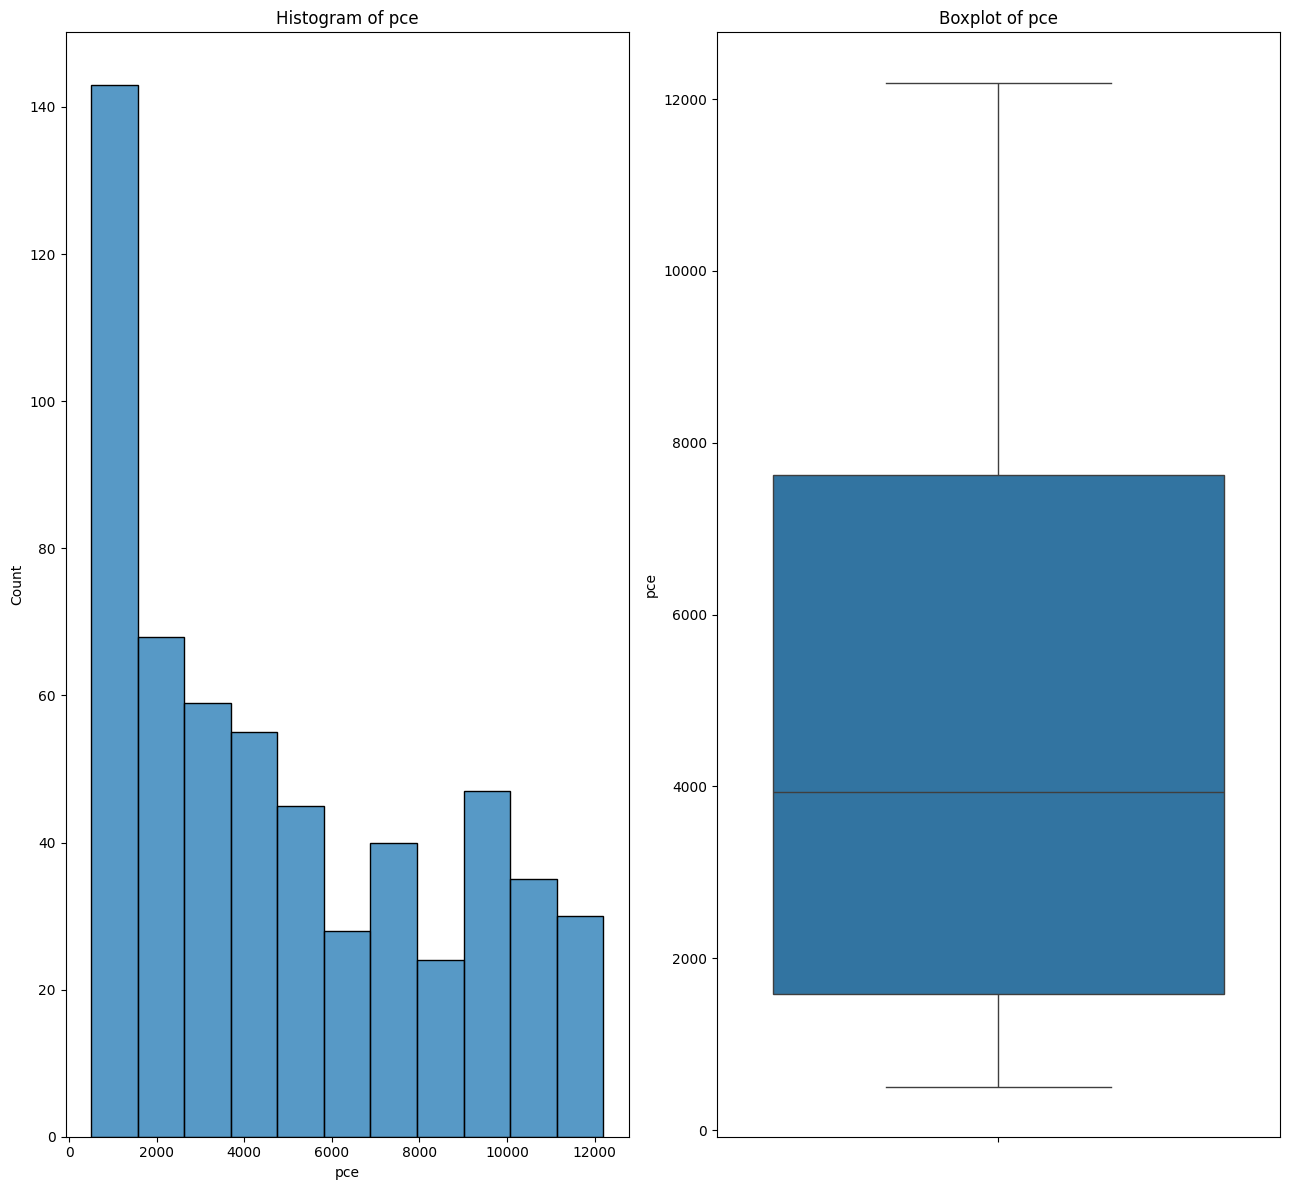

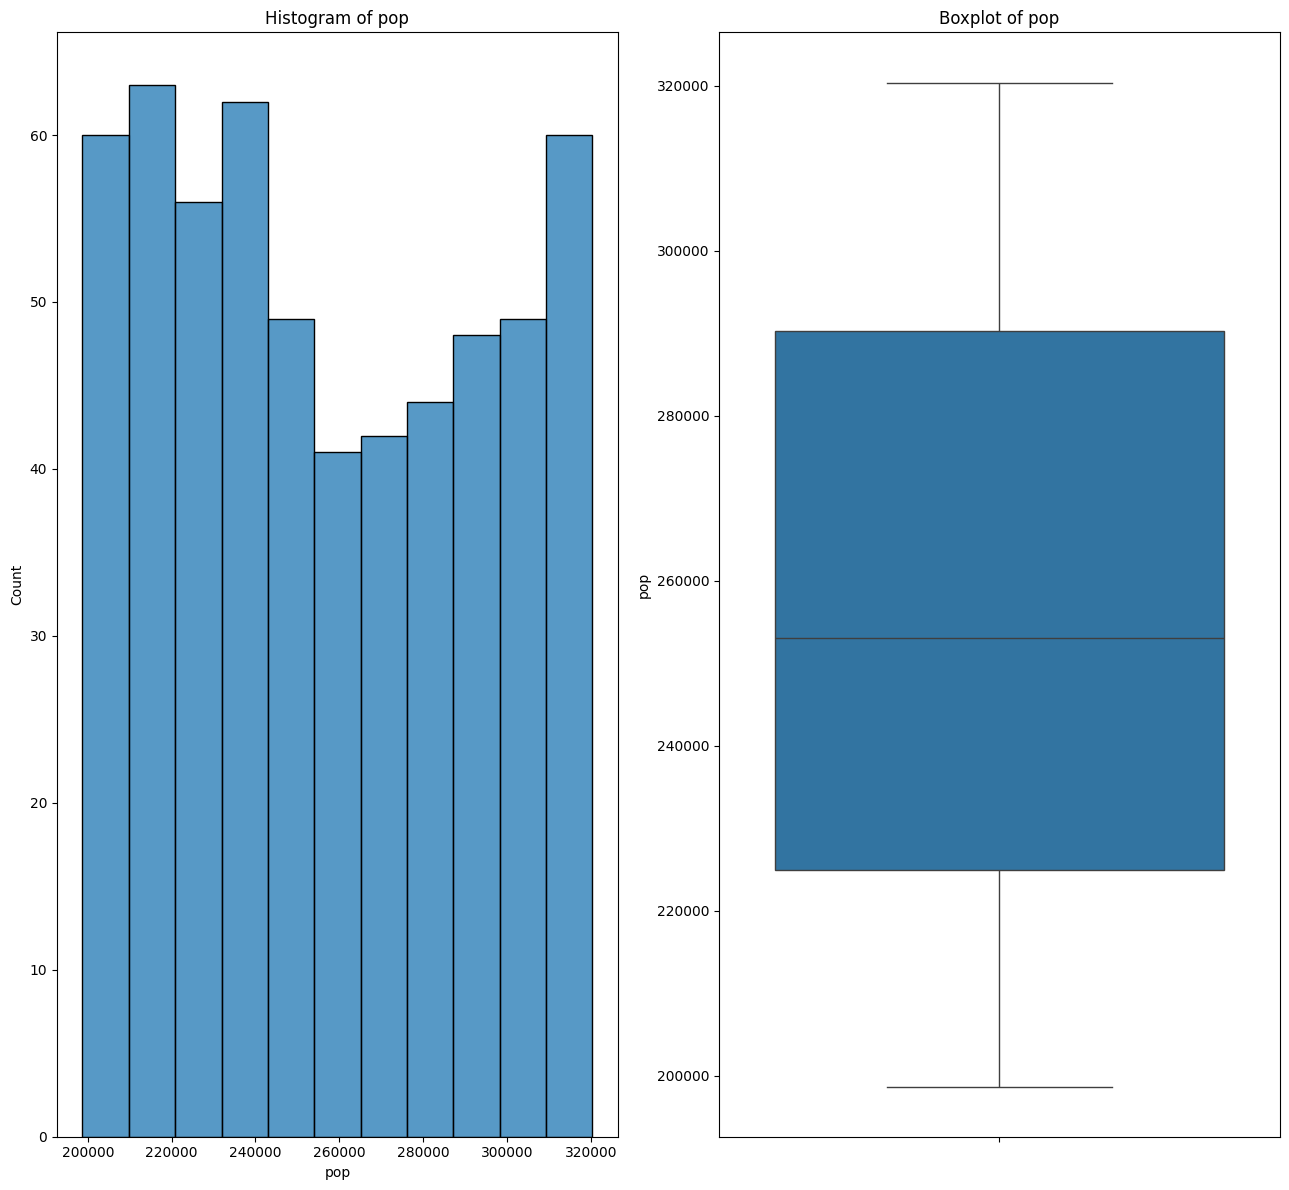

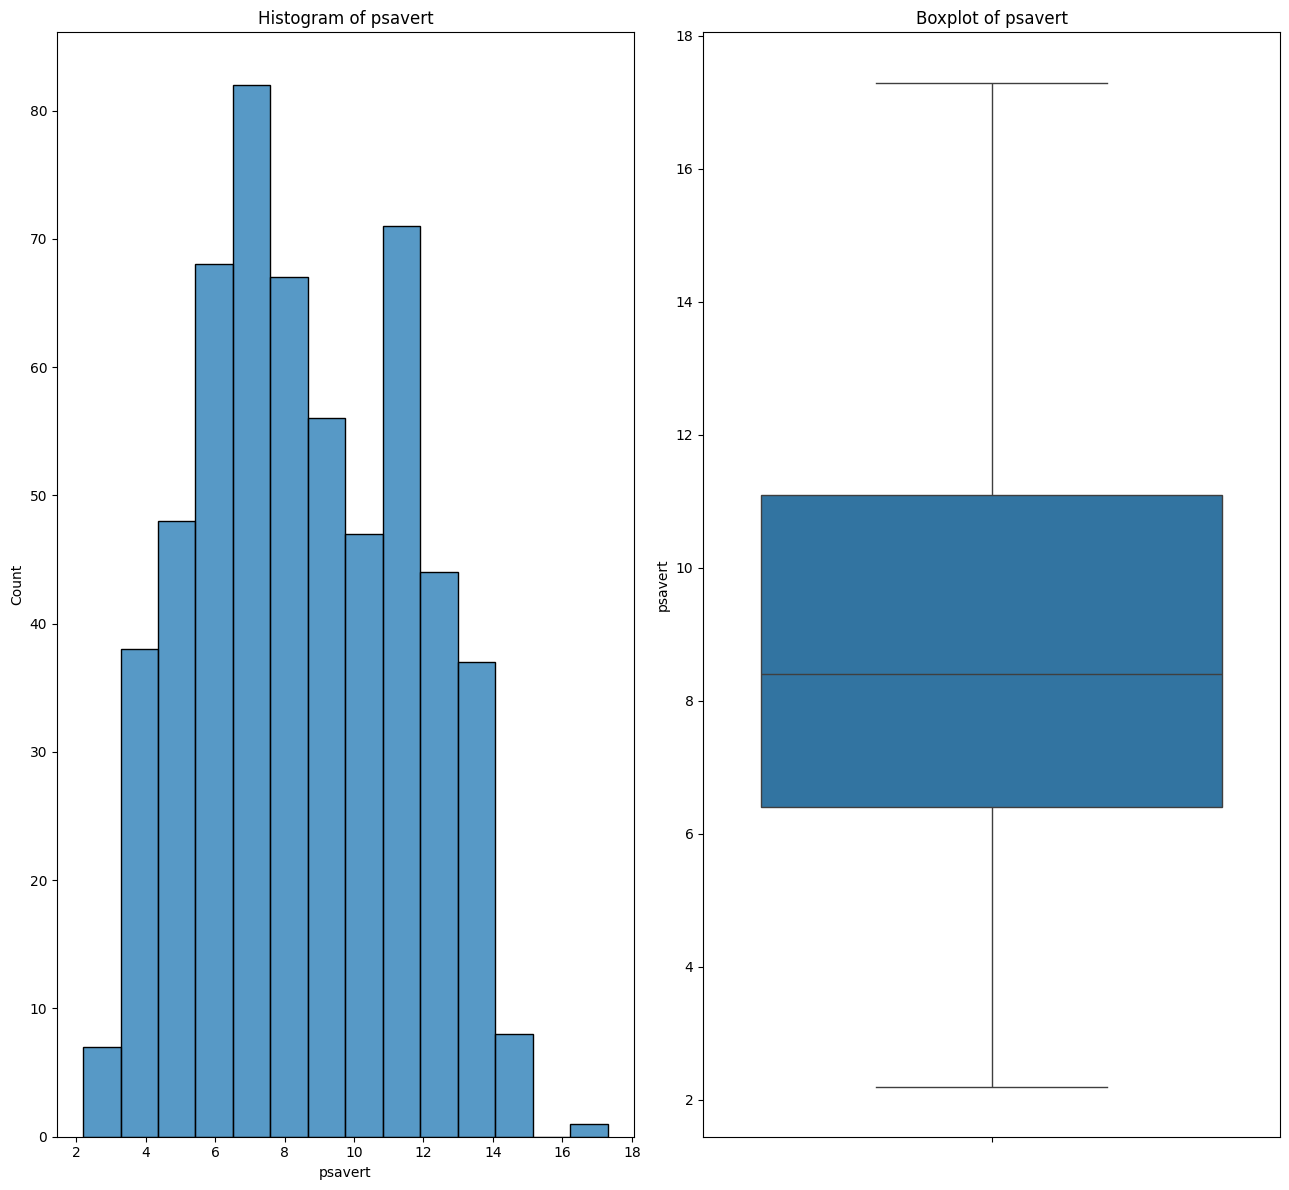

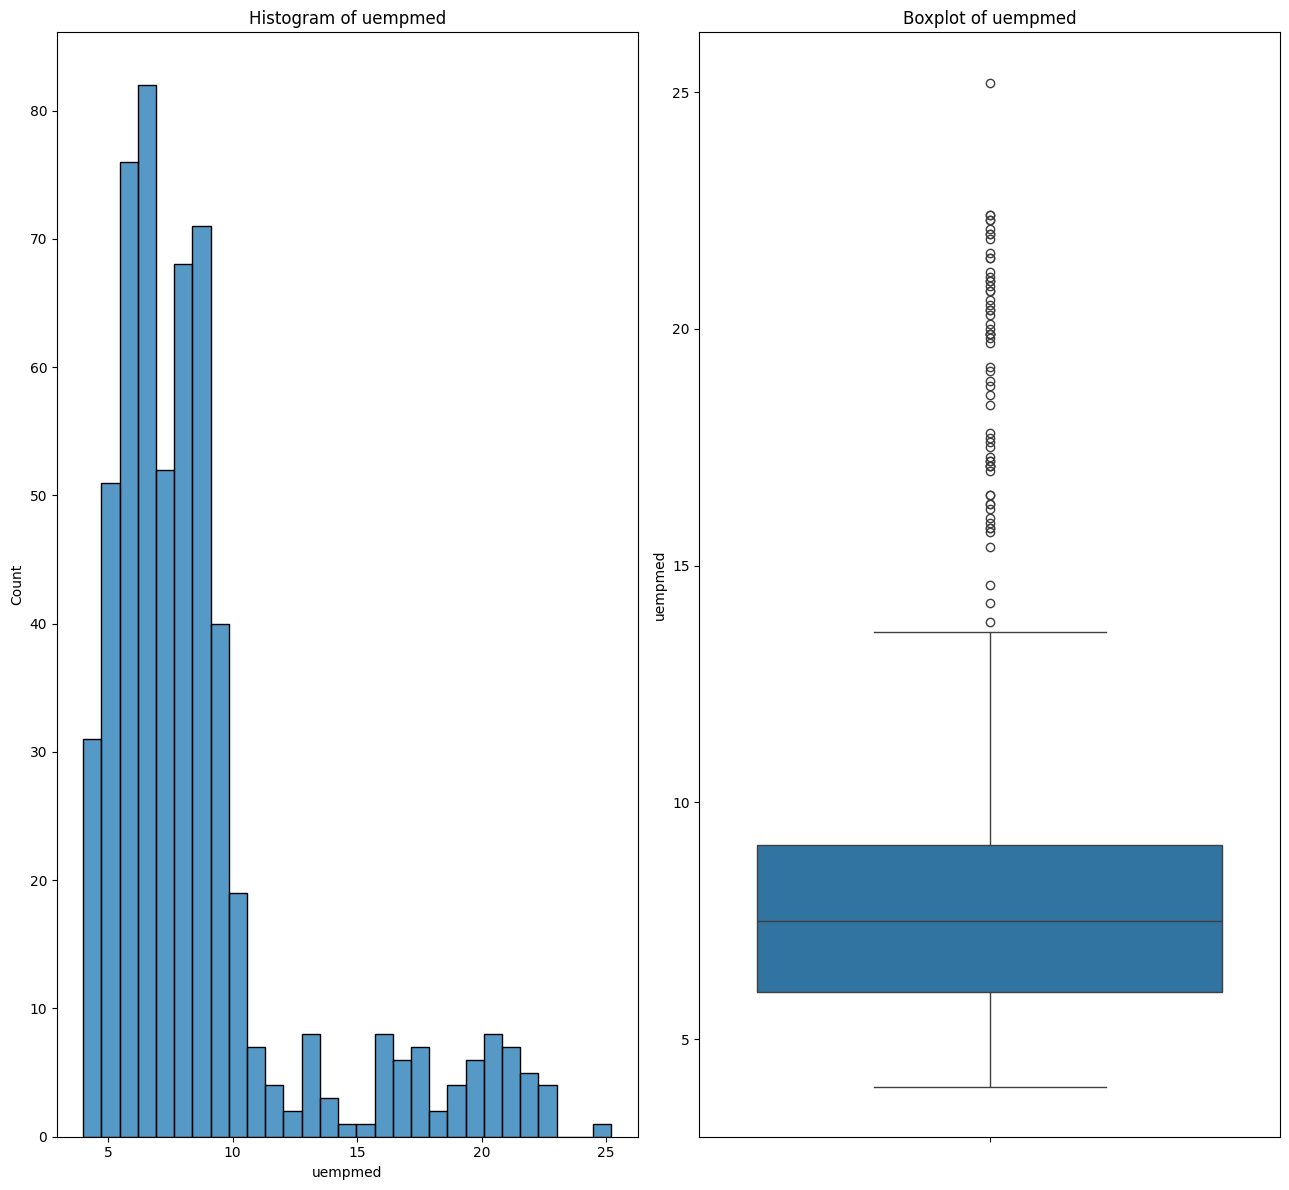

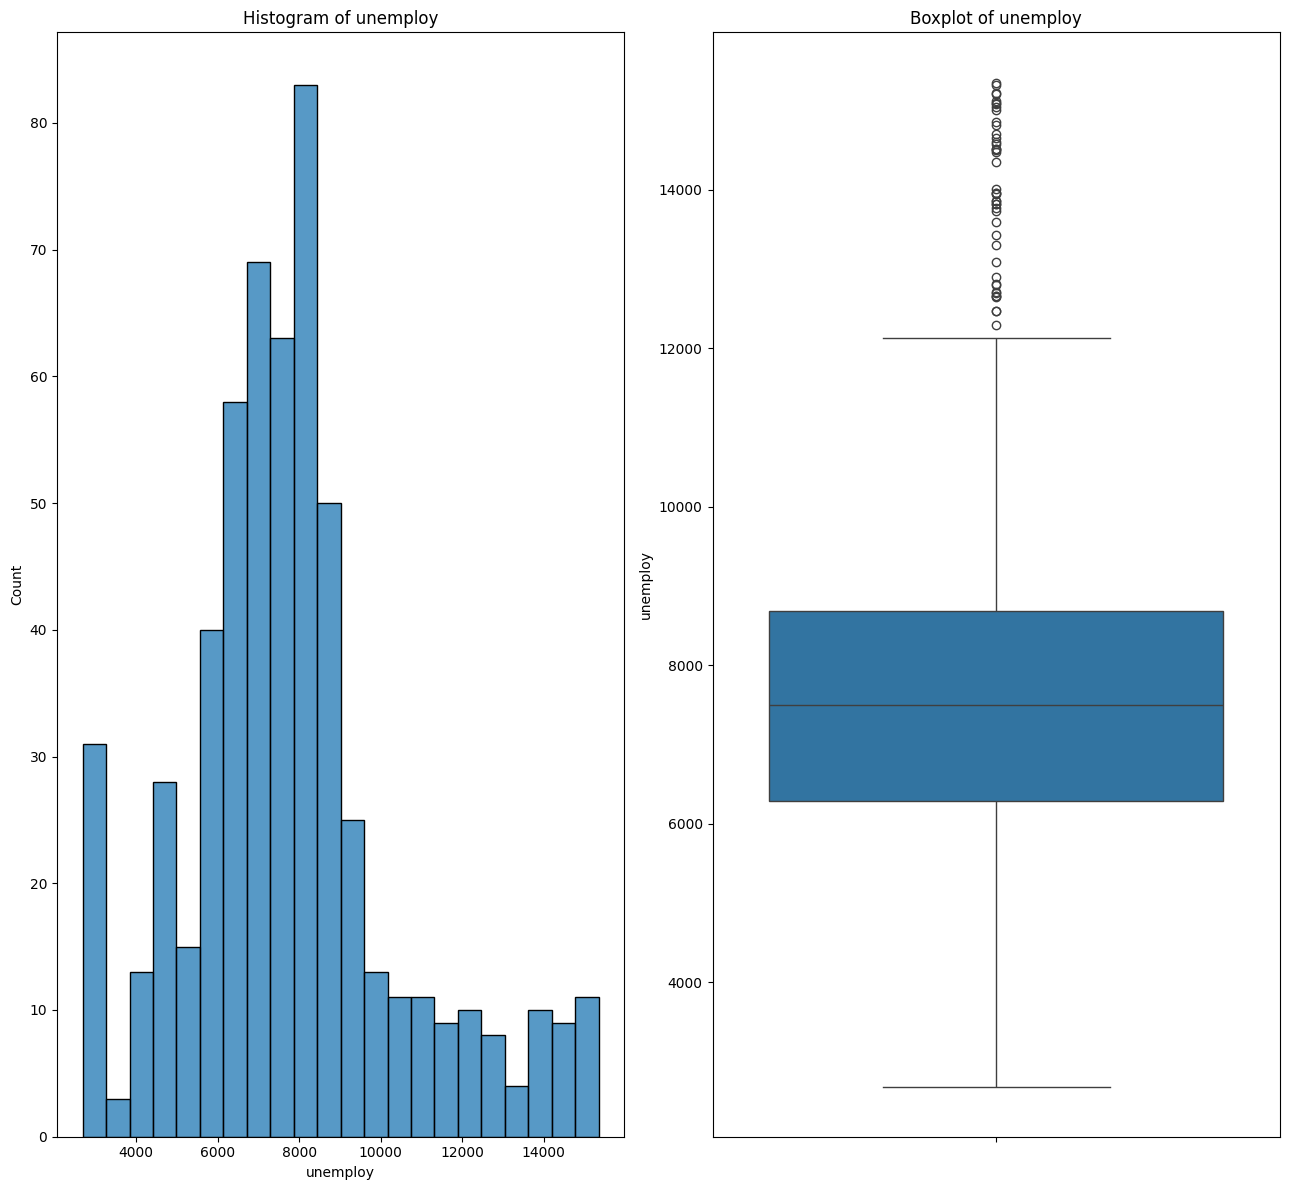

In [6]:
analyse_exploratoire(data)

In [7]:

def analyse_descriptive(df):
    # On s'assure que l'index est bien au format datetime (préalable indispensable)
    # Si ce n'est pas le cas, décommente la ligne suivante :
    # df.index = pd.to_datetime(df.index)

    for col in df.columns: # C'est mieux d'itérer sur df.columns
        fig, ax = plt.subplots(figsize=(15, 6)) # On augmente la largeur pour avoir de la place
        
        ax.plot(df.index, df[col])
        ax.set_title(f"Time Series of {col}")
        ax.set_xlabel("Date")
        
        # --- PARTIE CLÉ : GESTION DE L'AXE X ---
        
        # 1. Définir l'intervalle : YearLocator(1) met une graduation chaque année
        # Si c'est trop serré, tu peux mettre YearLocator(2) pour tous les 2 ans, etc.
        ax.xaxis.set_major_locator(mdates.YearLocator(1))
        
        # 2. Définir le format : '%Y' affiche seulement l'année (ex: 1990)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        
        # 3. Rotation : On tourne les dates pour qu'elles ne se chevauchent pas
        plt.xticks(rotation=45, ha='right') 
        
        # Ajout d'une grille pour mieux lire
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout() # Ajuste les marges automatiquement
        plt.show()
        
        

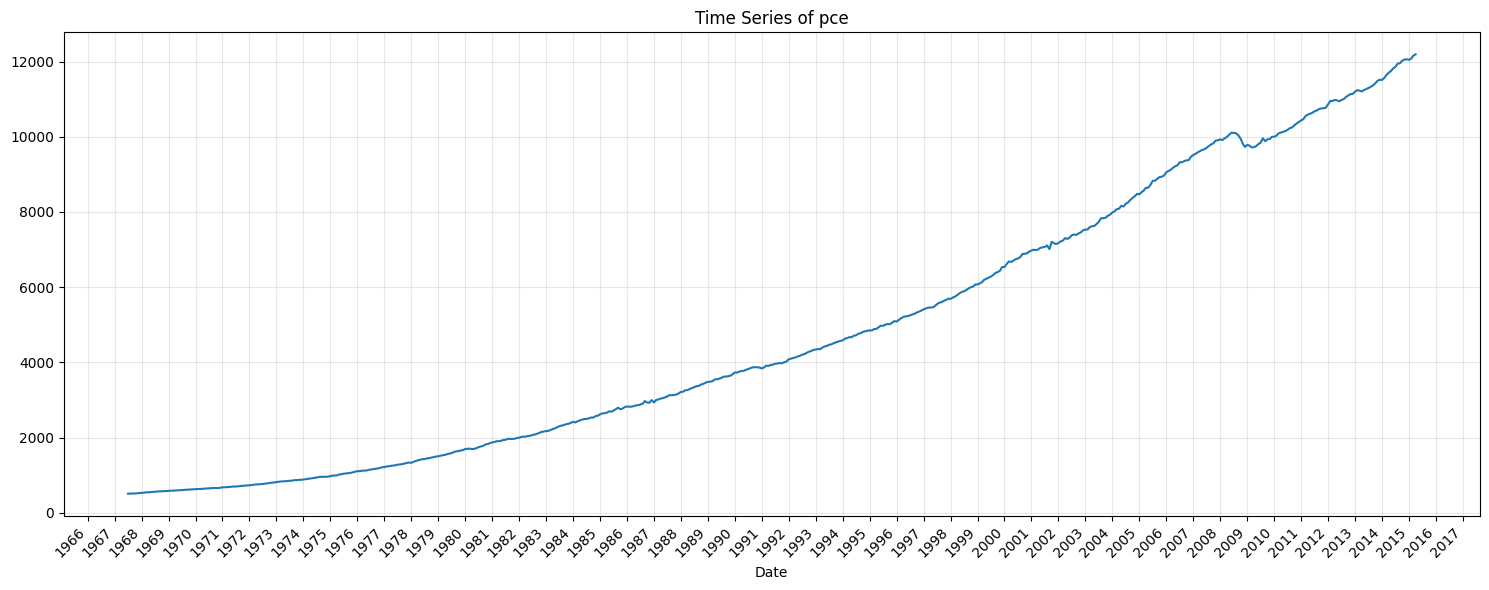

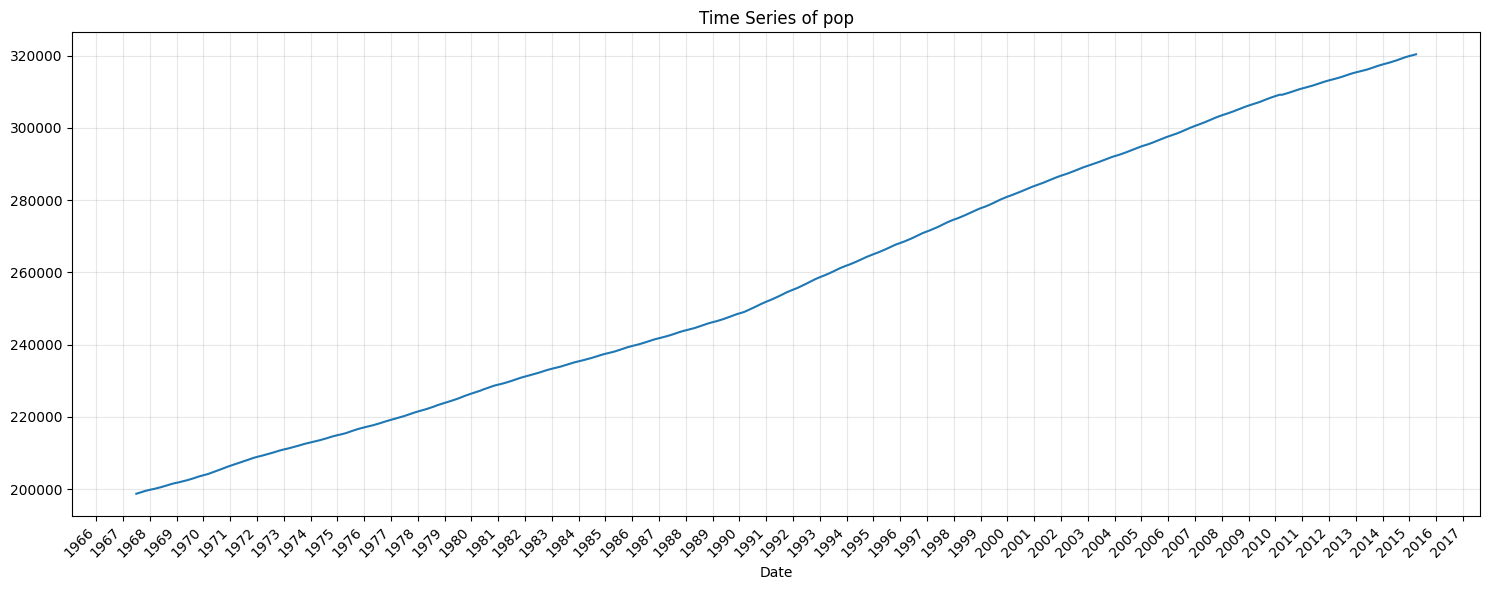

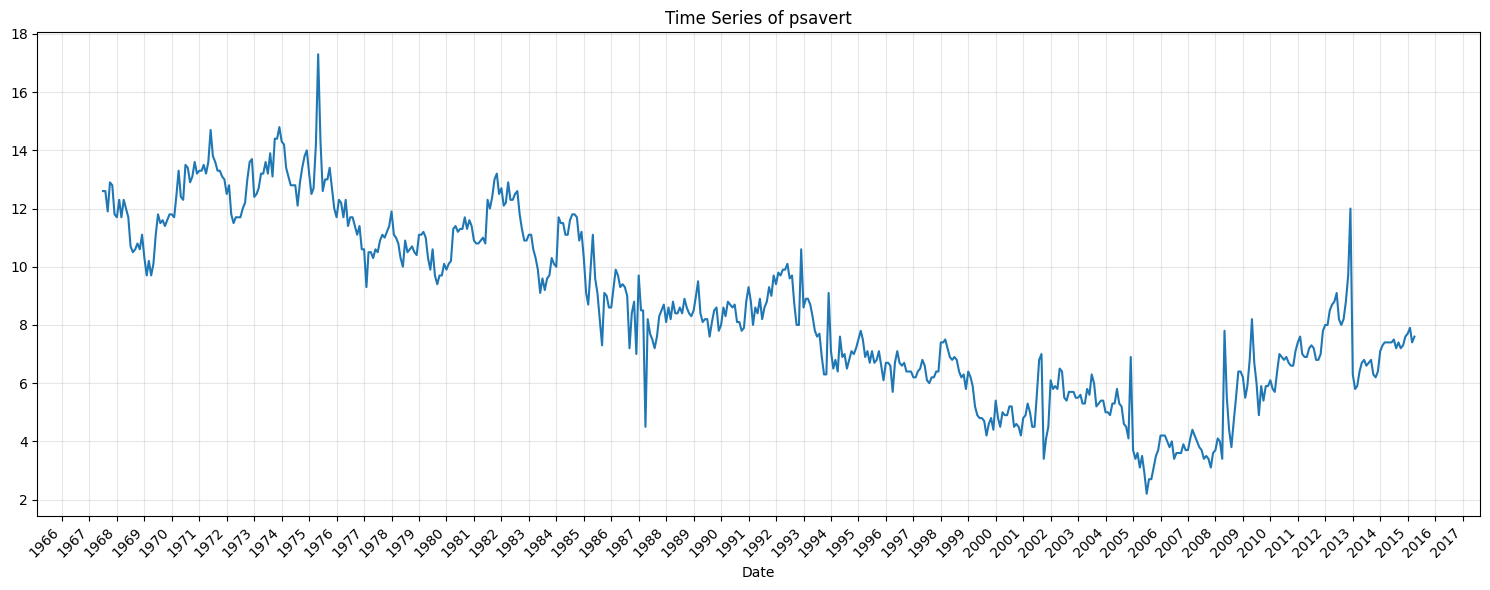

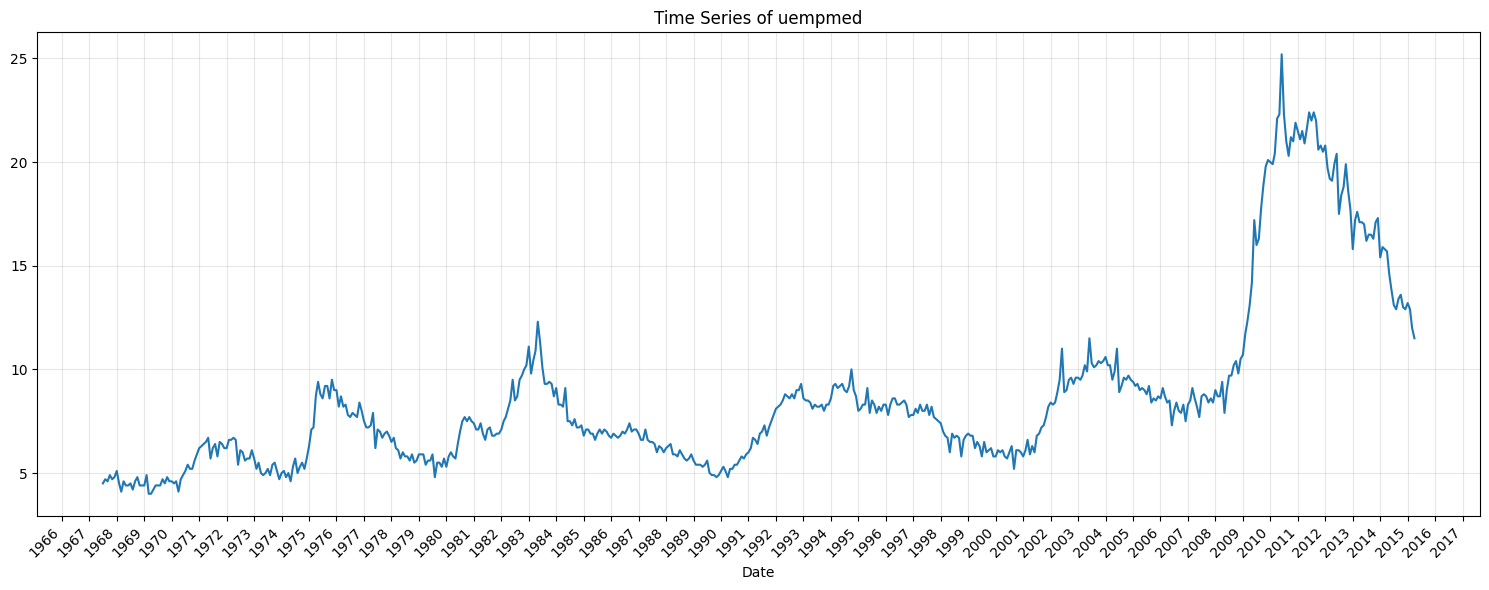

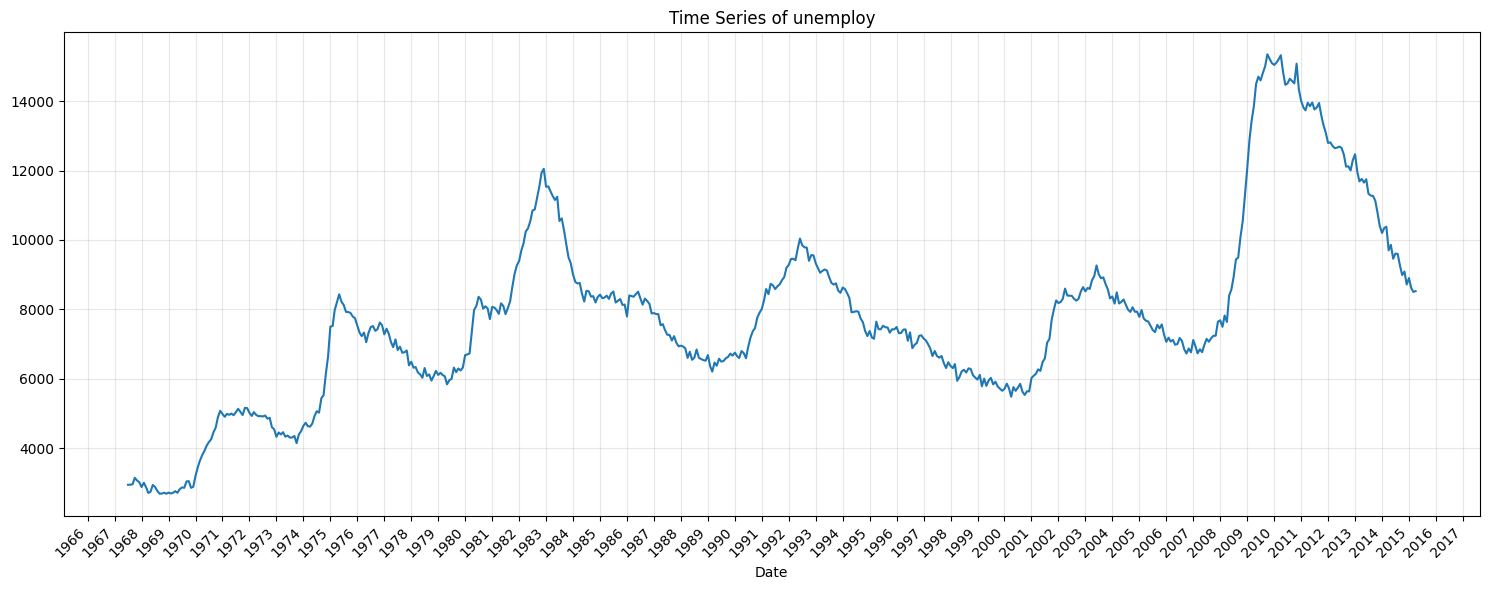

In [8]:
analyse_descriptive(data)

## concentrons-nous sur le nombre de chomeurs pour chaque année  ou soit sur le taux de chomage 

In [9]:
annee=data.index.year
annee=annee.drop_duplicates()

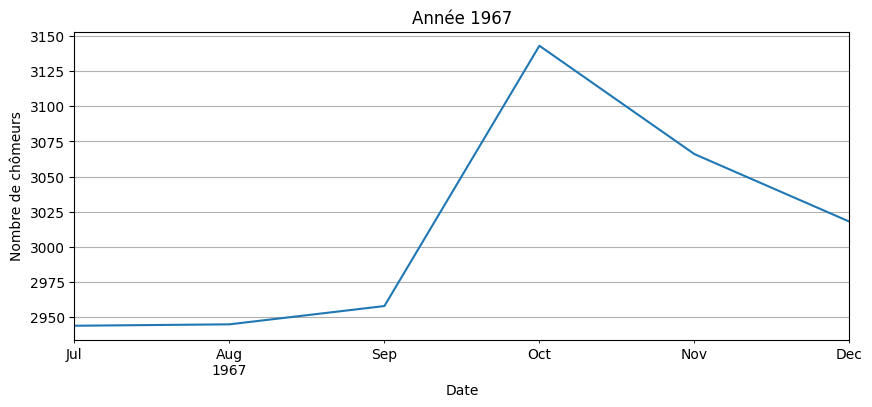

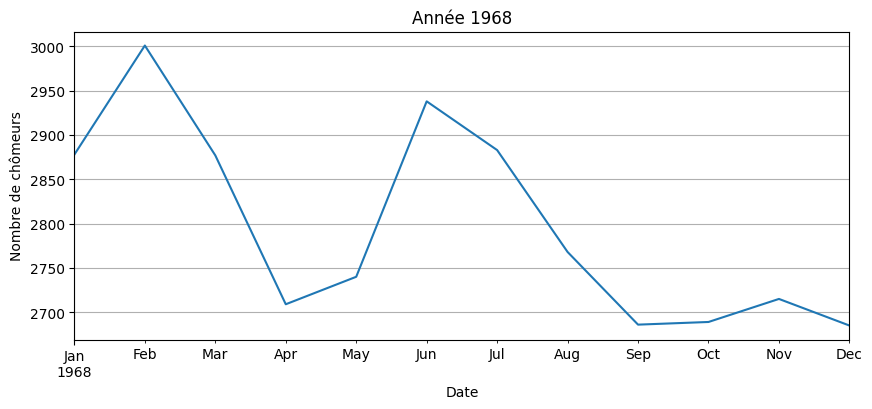

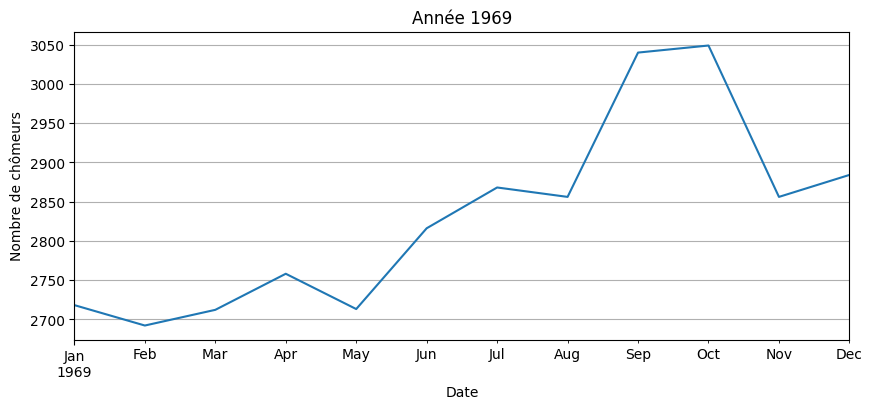

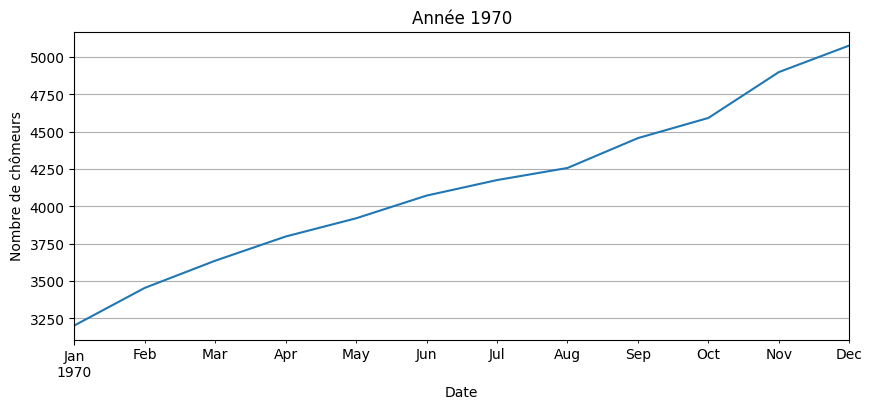

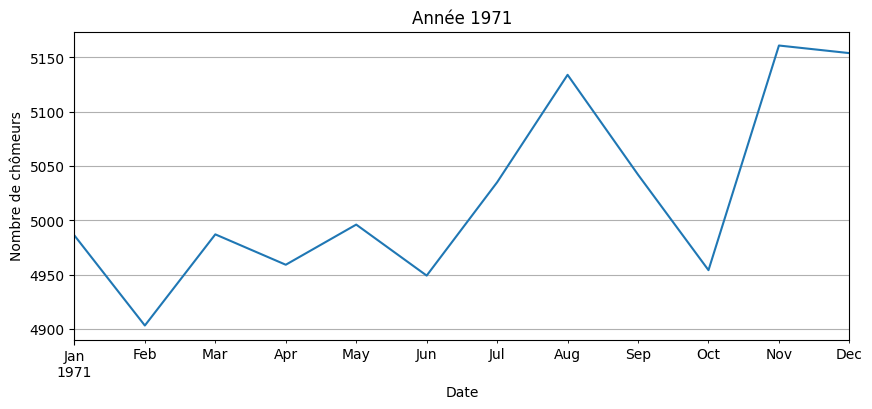

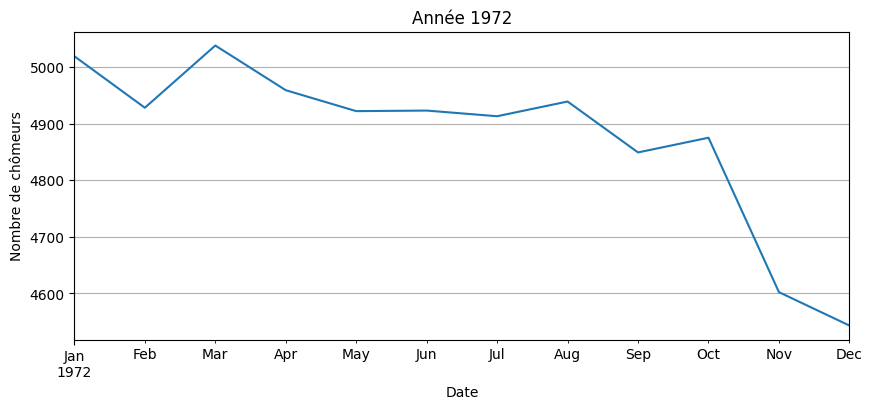

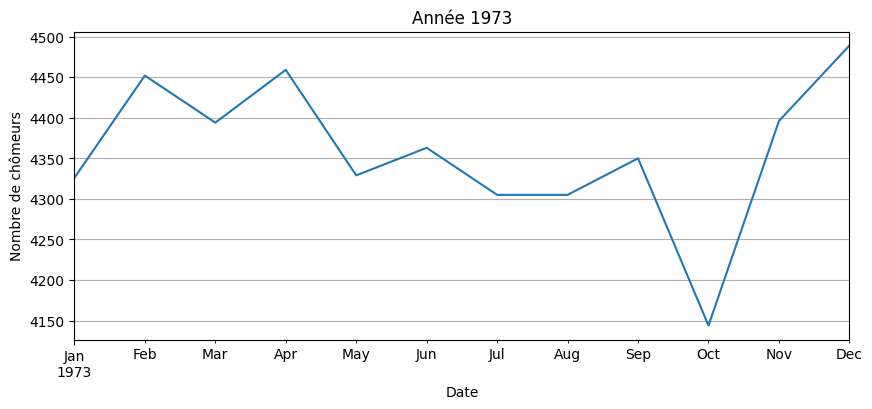

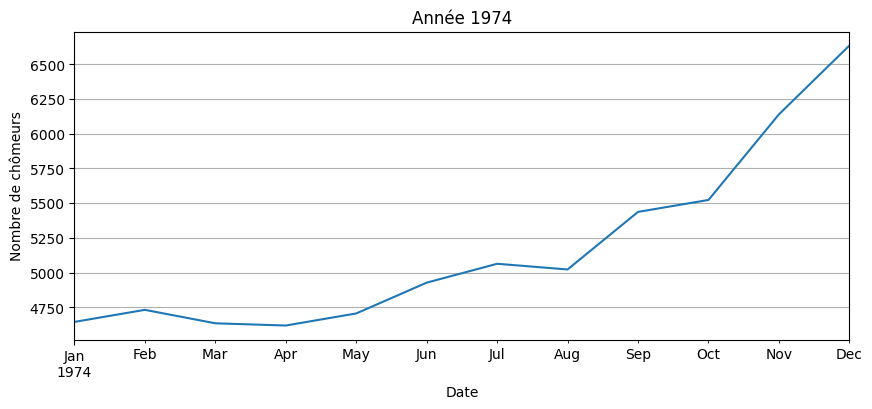

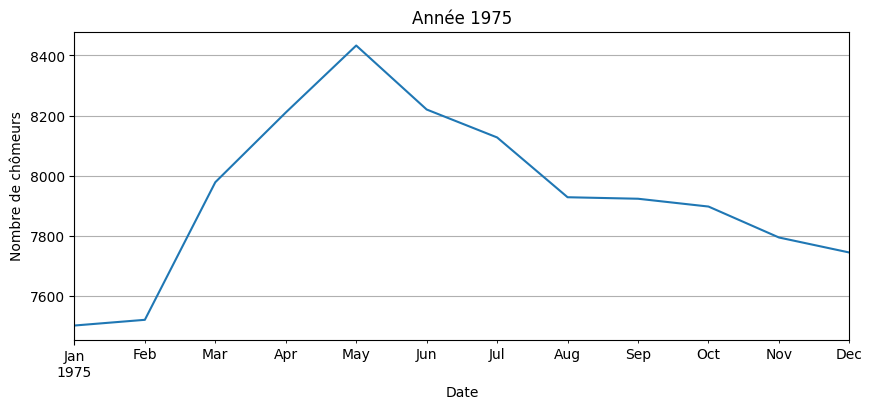

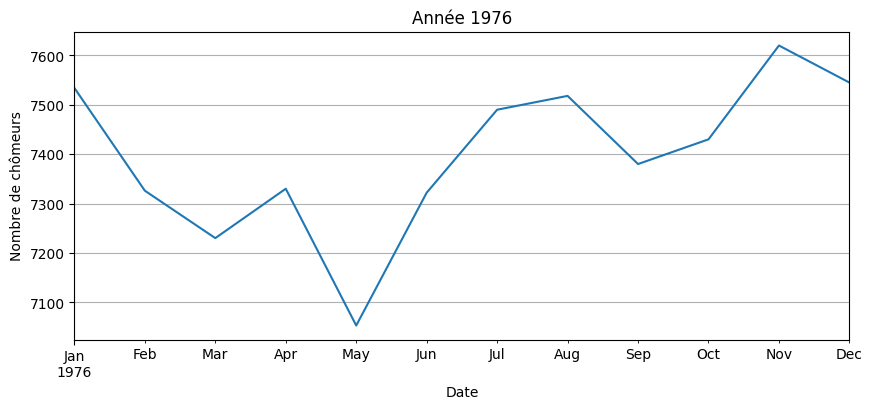

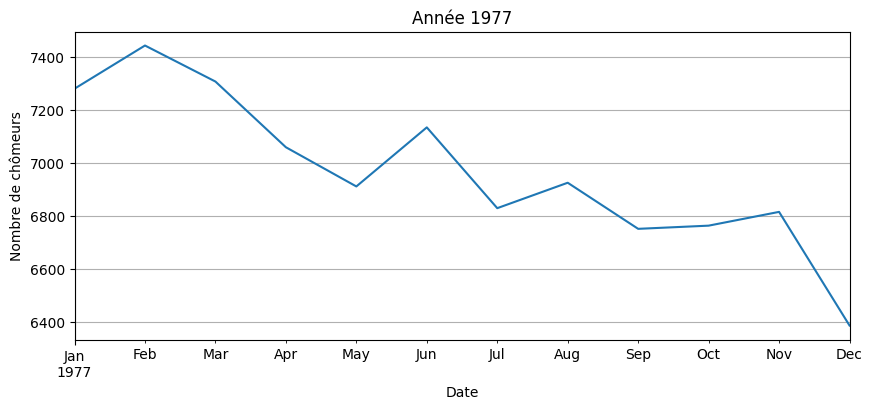

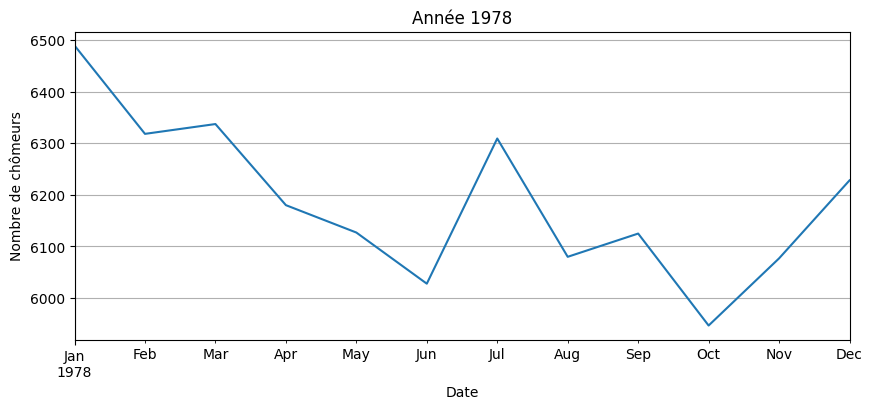

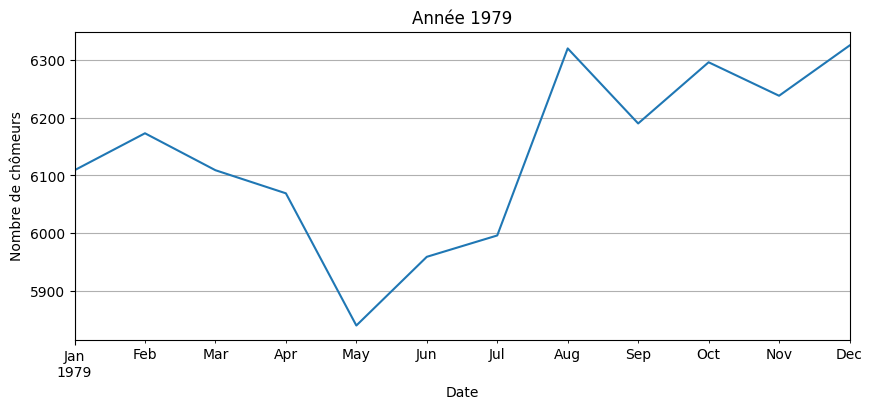

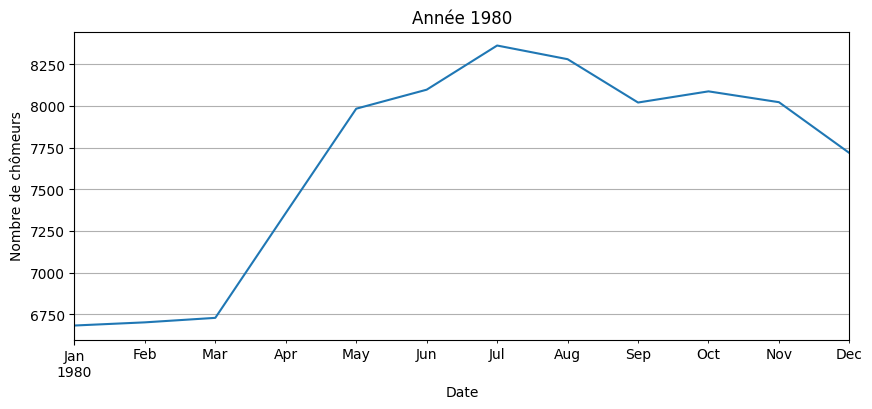

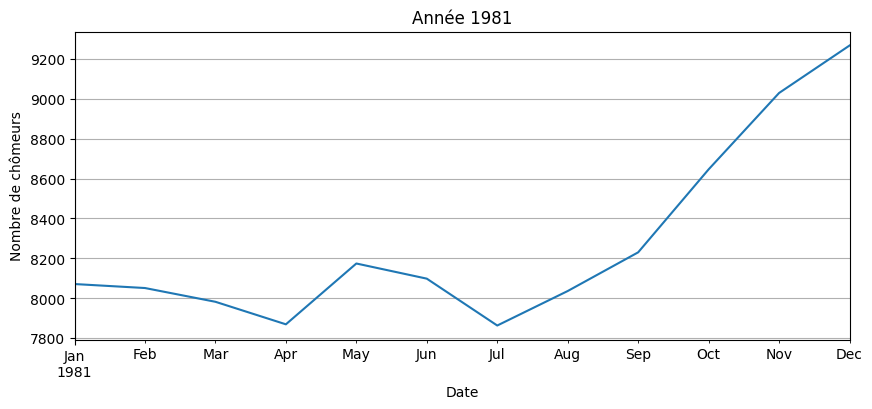

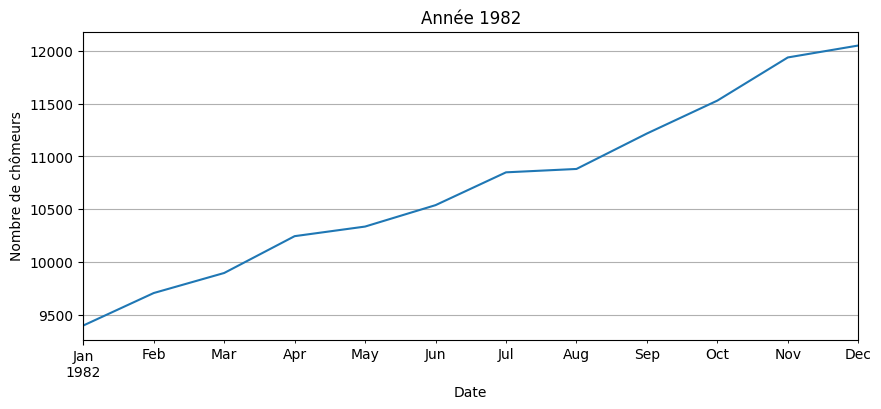

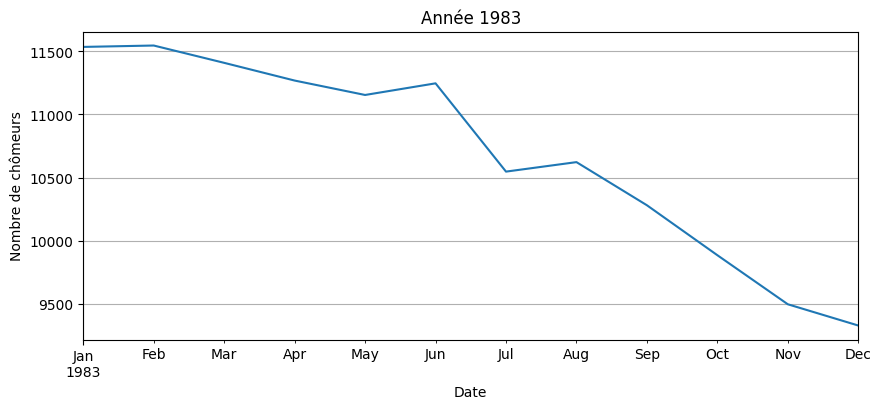

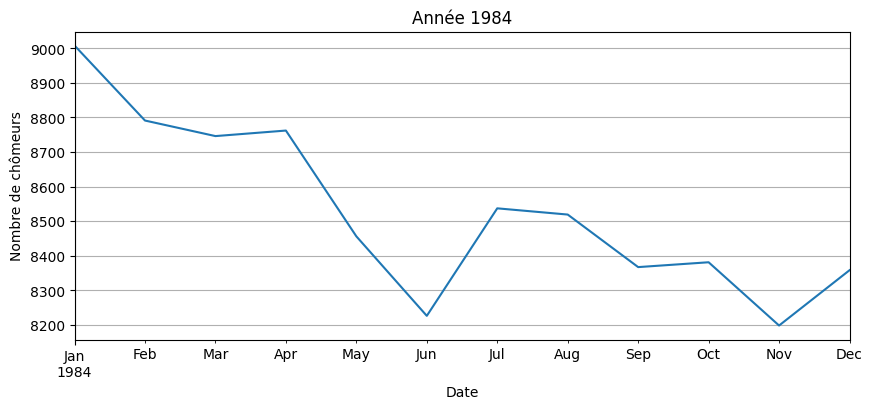

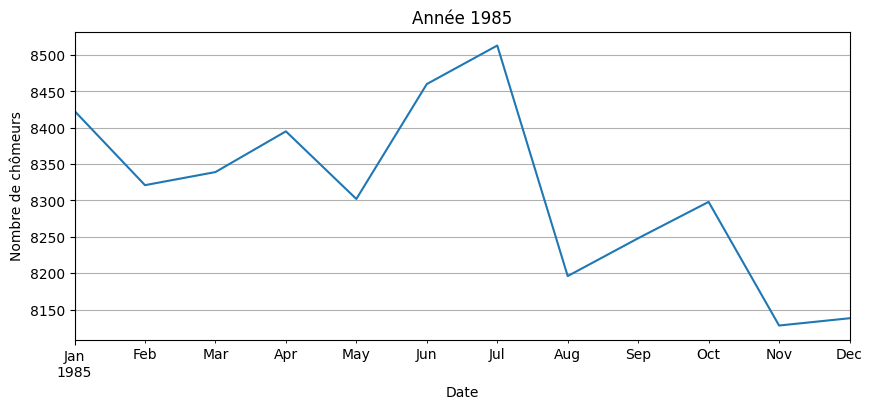

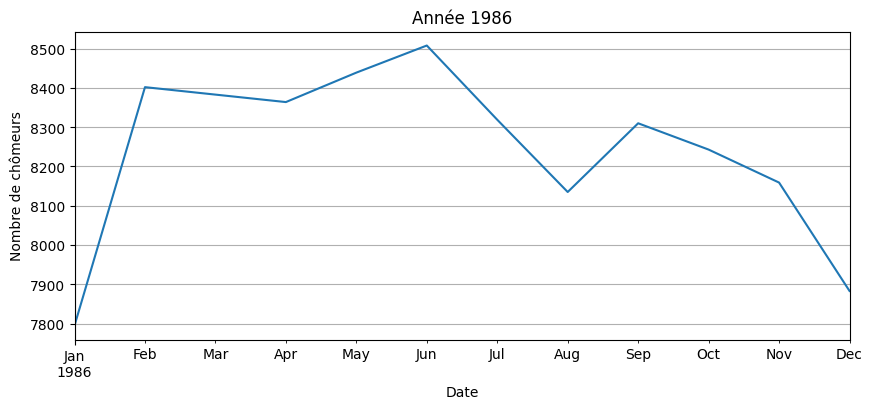

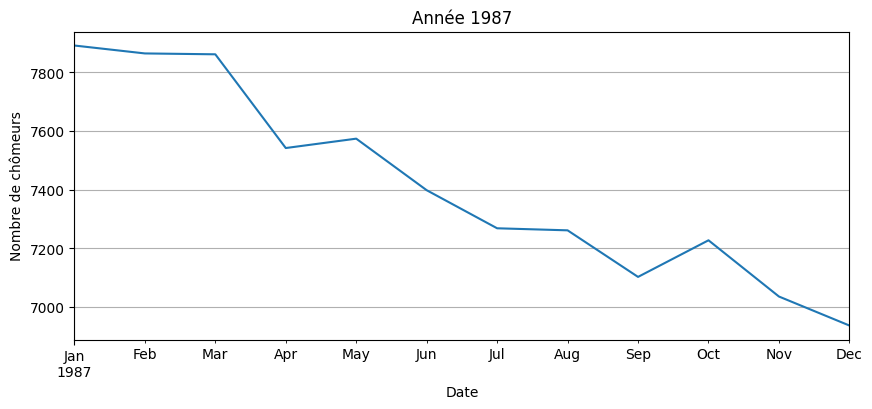

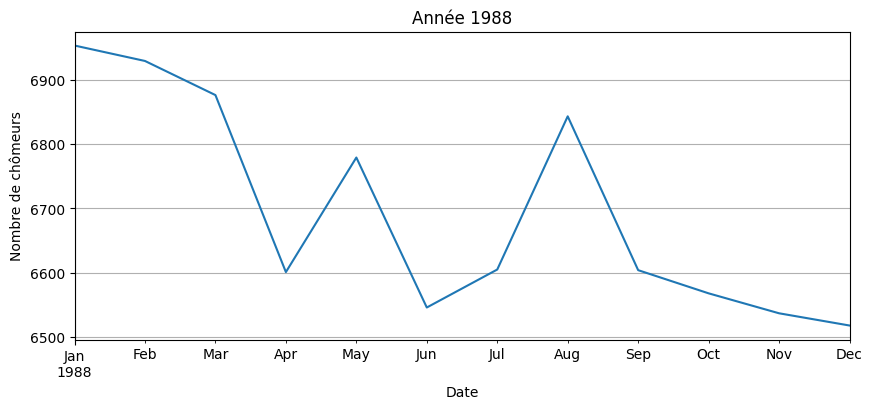

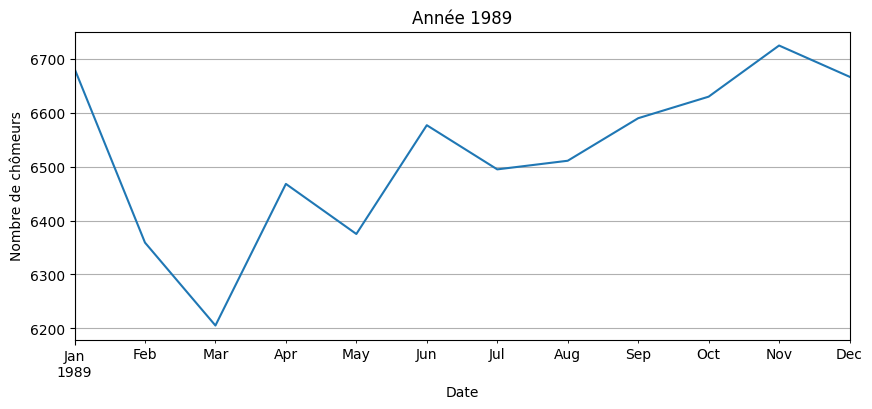

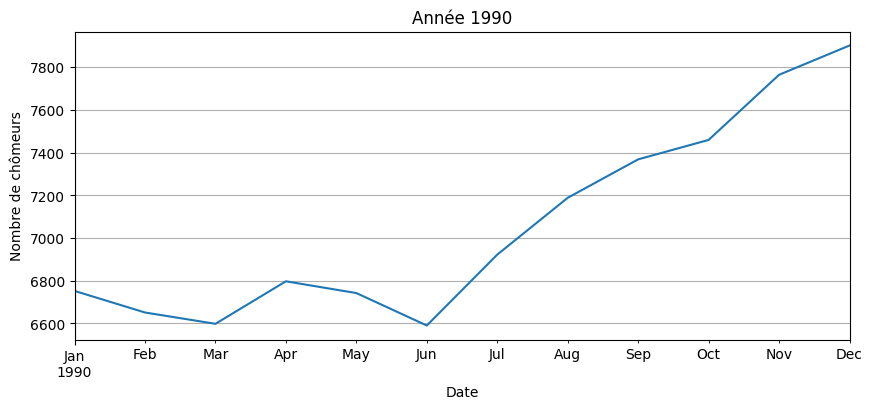

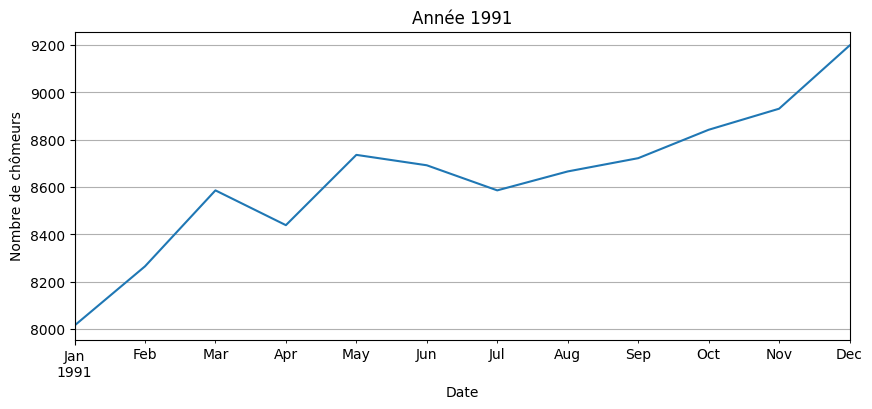

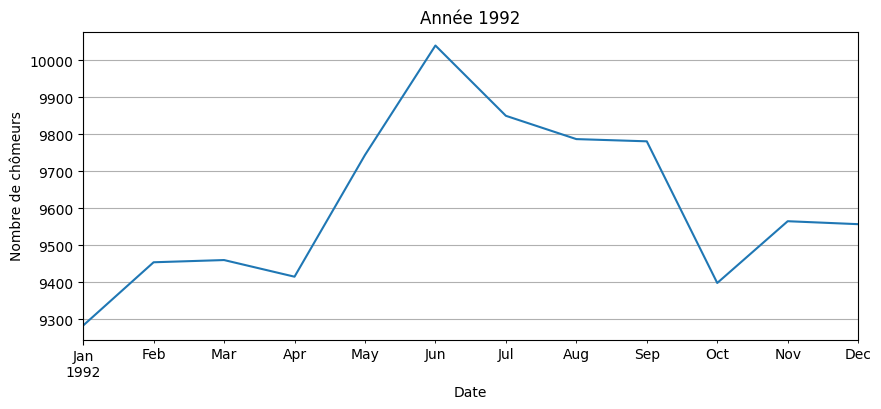

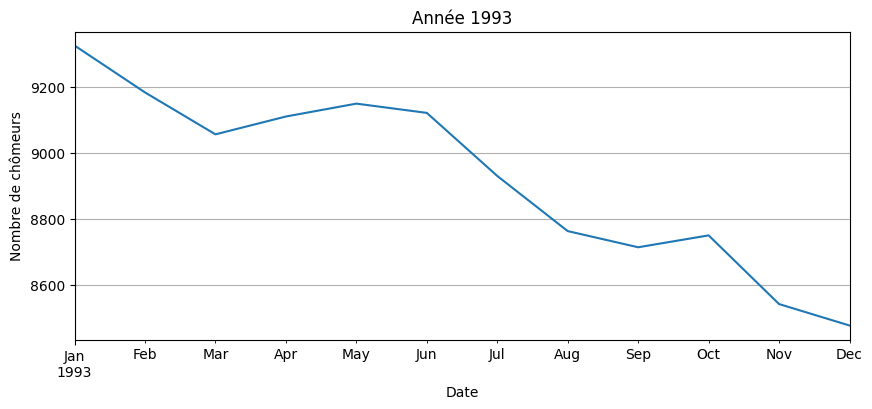

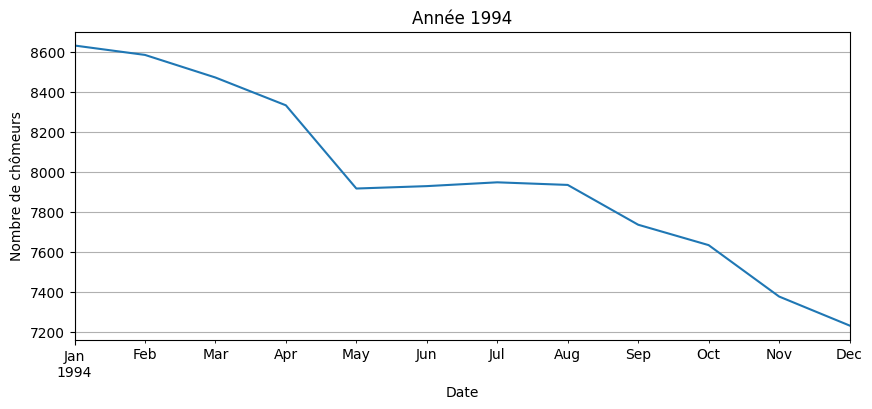

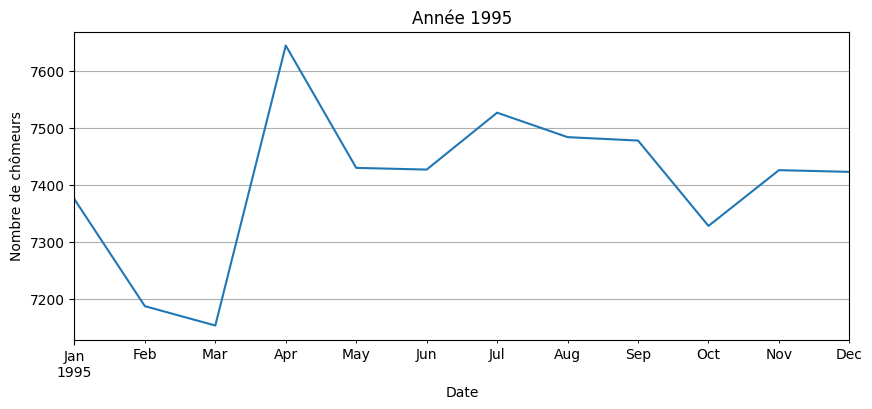

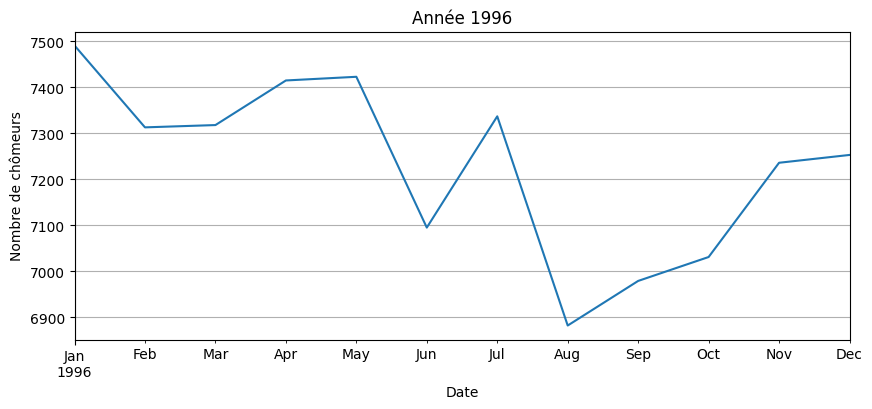

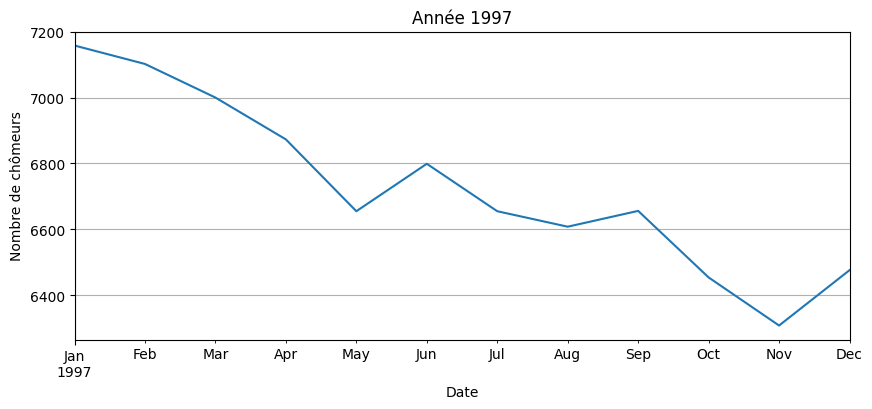

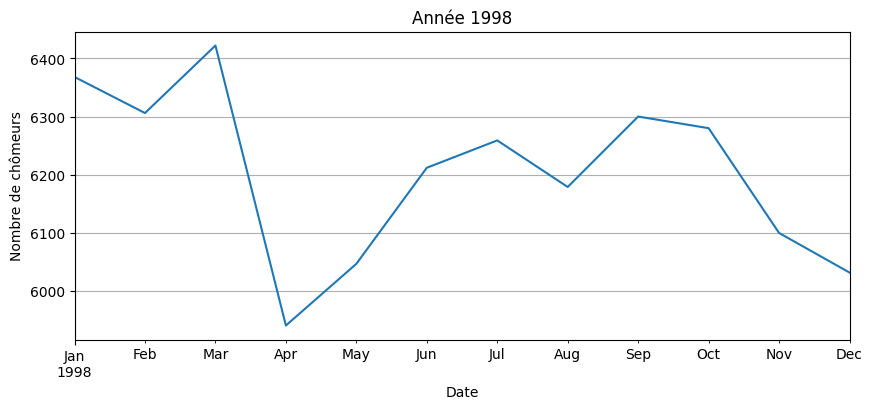

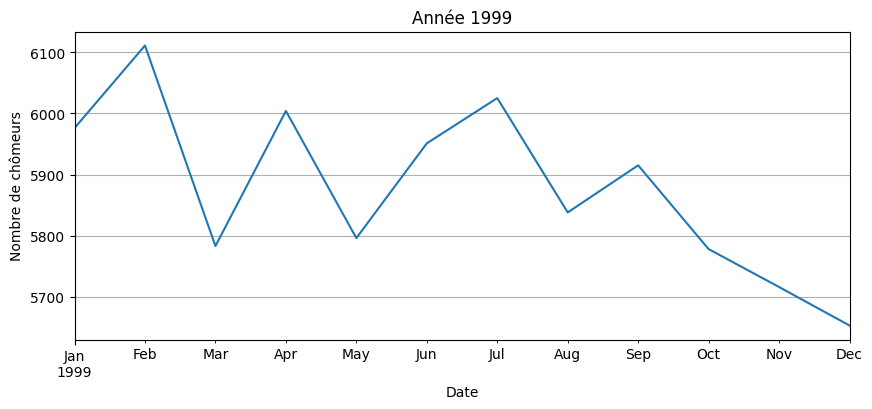

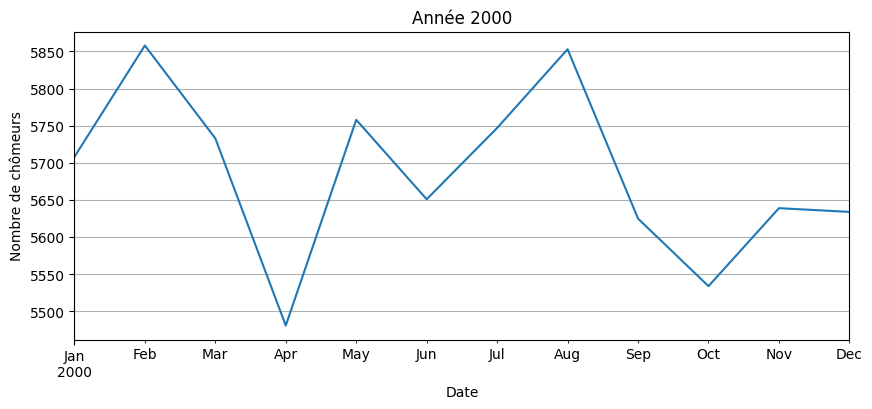

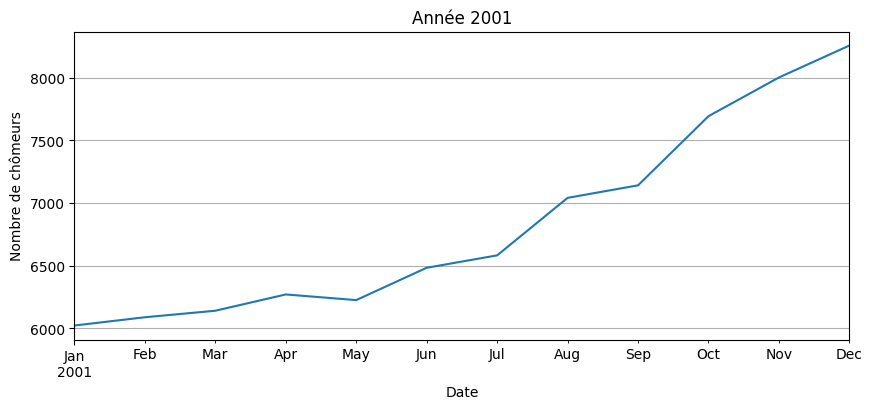

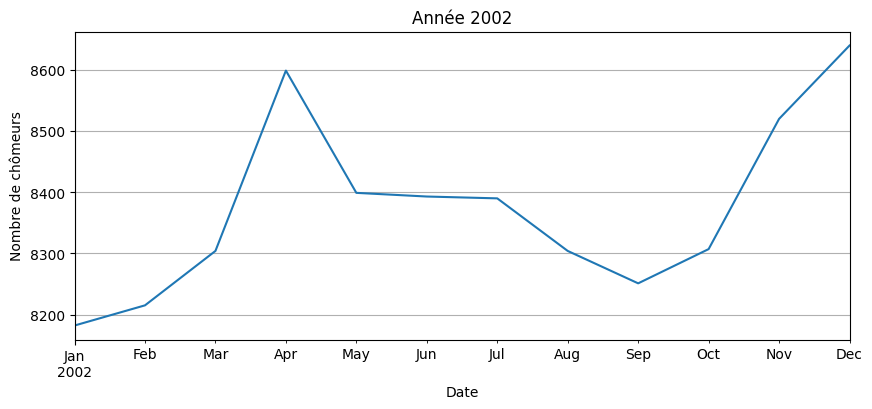

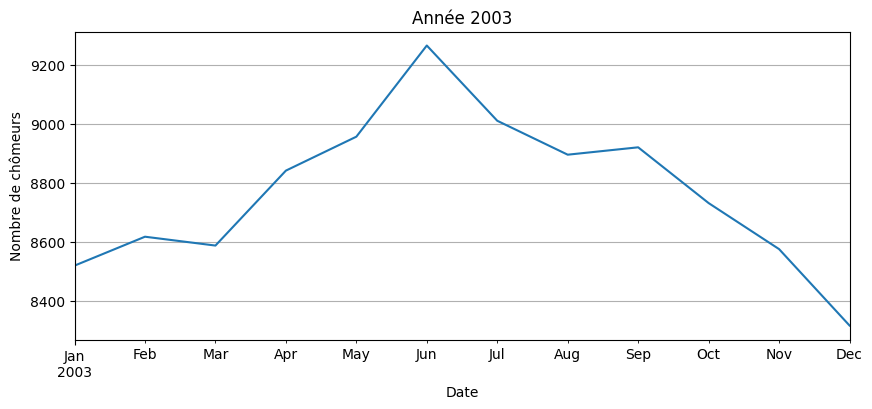

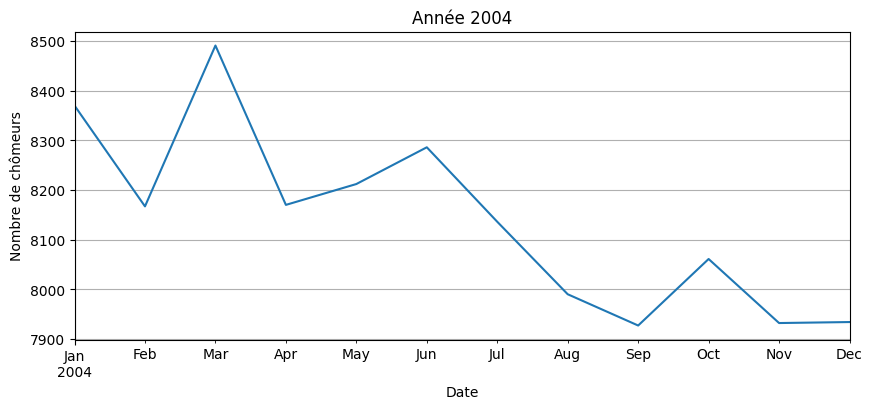

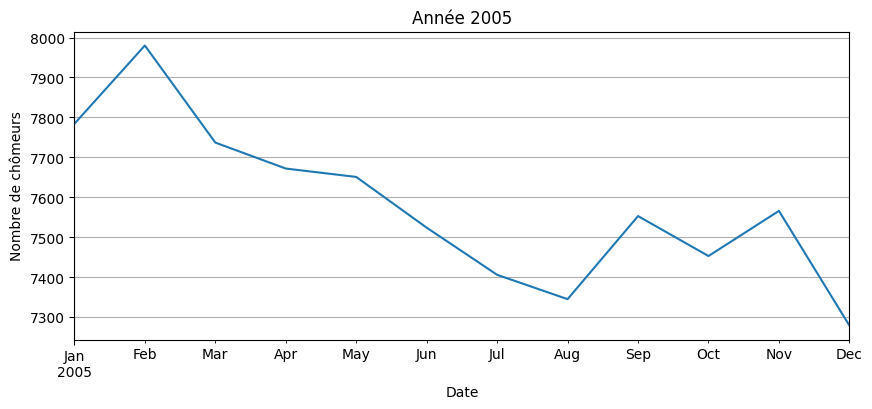

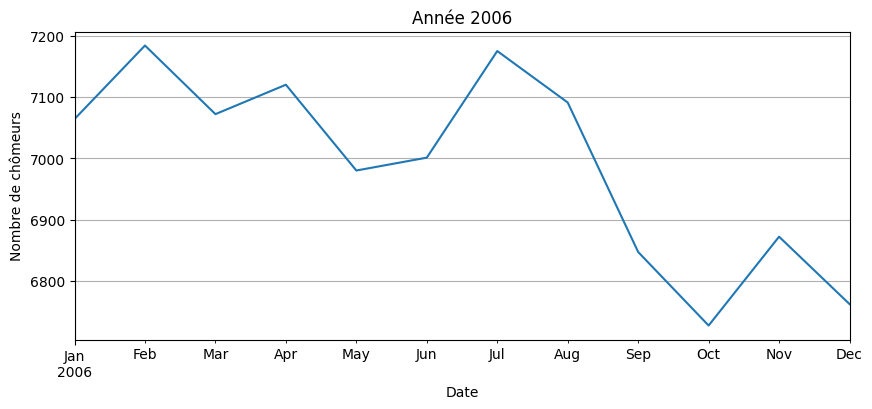

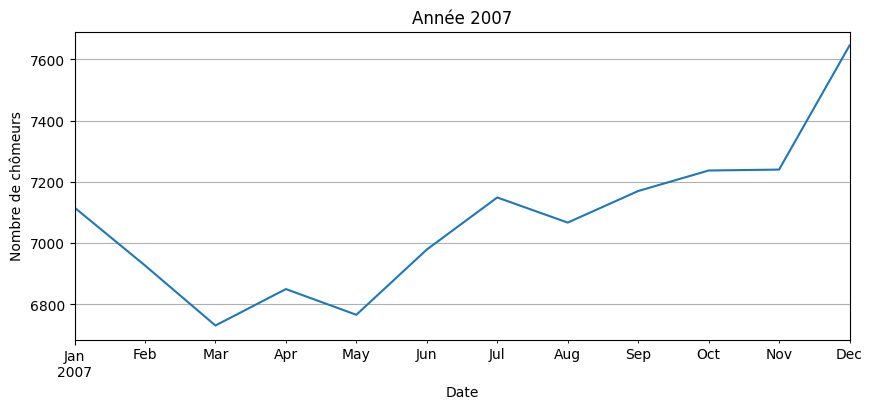

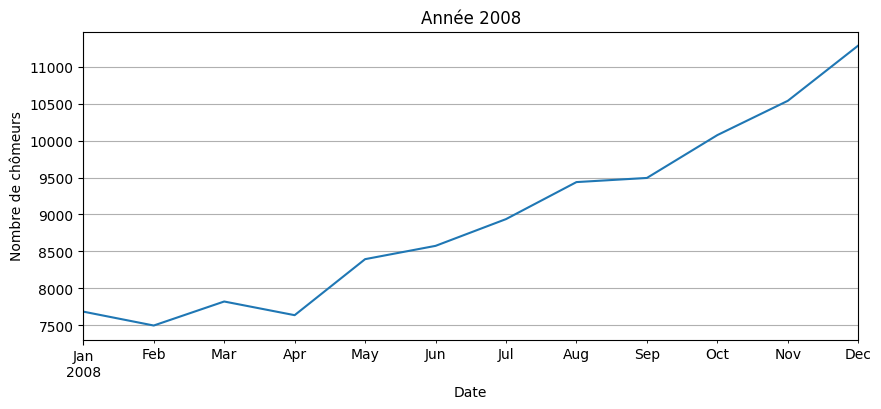

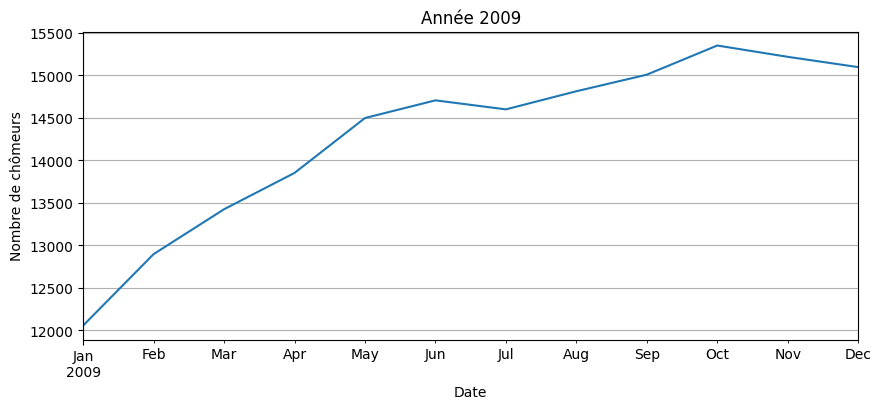

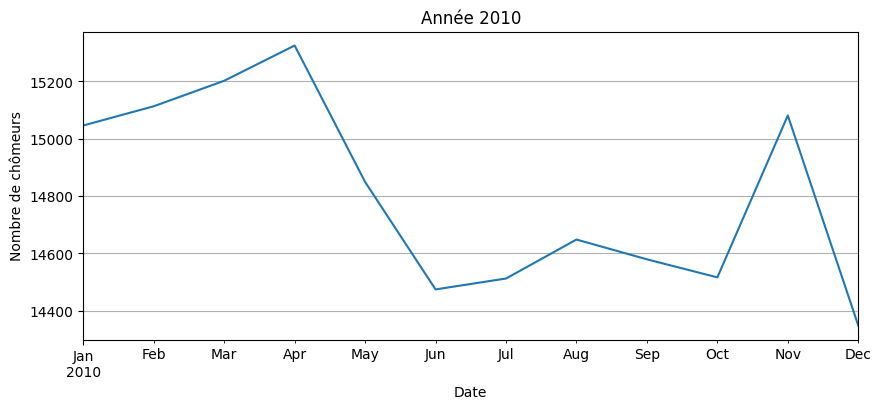

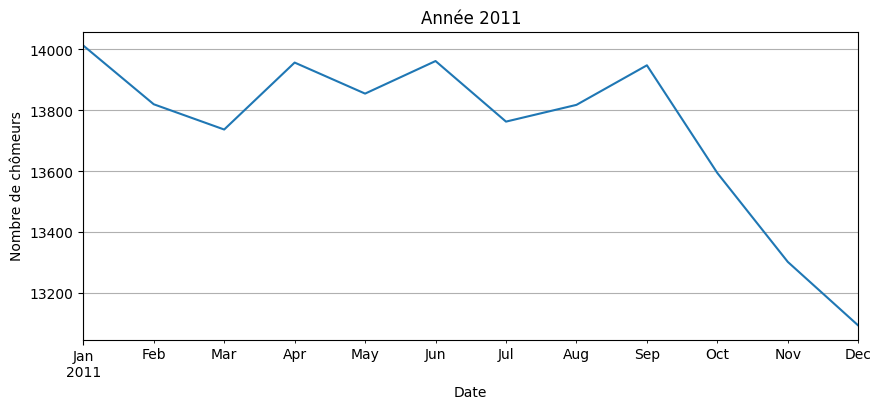

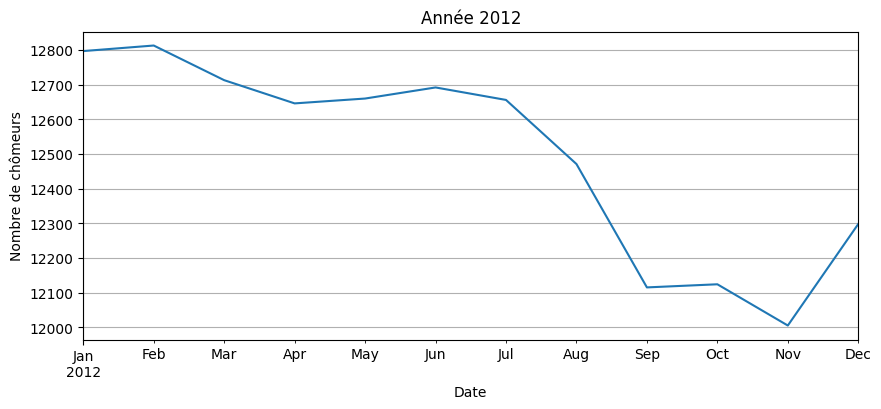

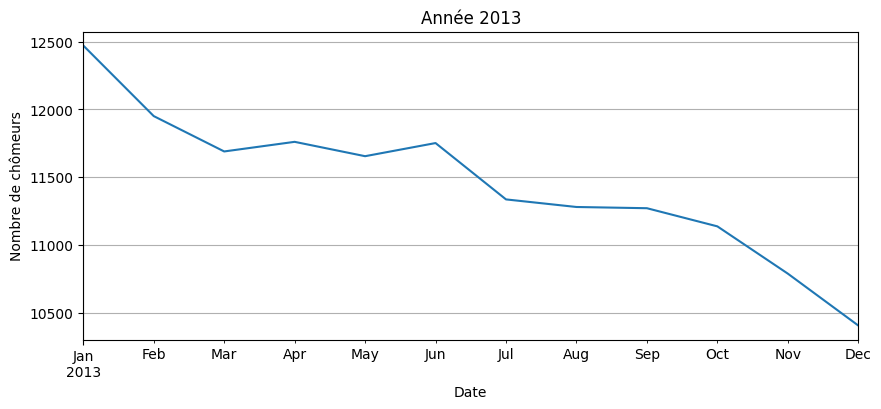

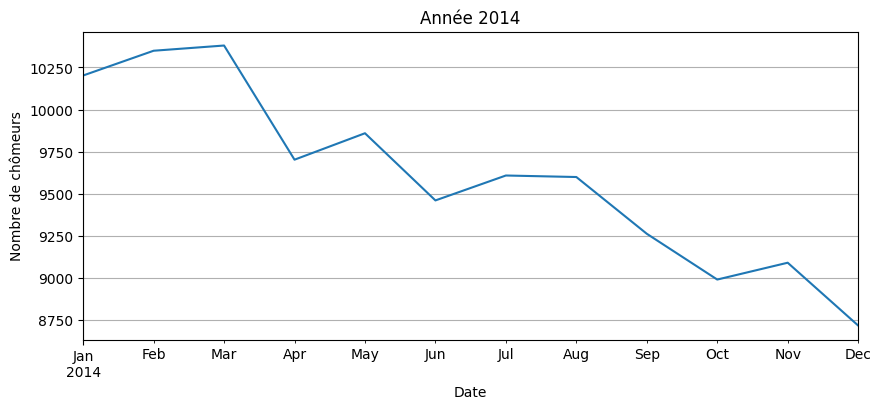

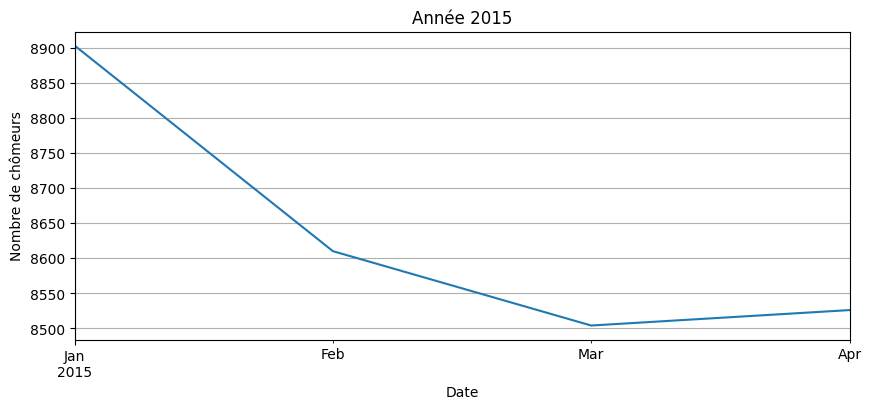

In [10]:
for year in annee:
    plt.figure(figsize=(10, 4)) # Créer une NOUVELLE figure à chaque boucle
    
    # On convertit 'year' en string (str) car le slicing temporel de pandas 
    # préfère souvent "2010" à 2010 (entier)
    data.loc[str(year), "unemploy"].plot()
    
    plt.title(f"Année {year}")
    plt.xlabel("Date")
    plt.ylabel("Nombre de chômeurs")
    plt.grid(True)
    
    plt.show() # Force l'affichage du graphique avant de passer à la boucle suivante
   


Text(0.5, 1.0, 'Nombre de chomeurs avec moyenne mobile')

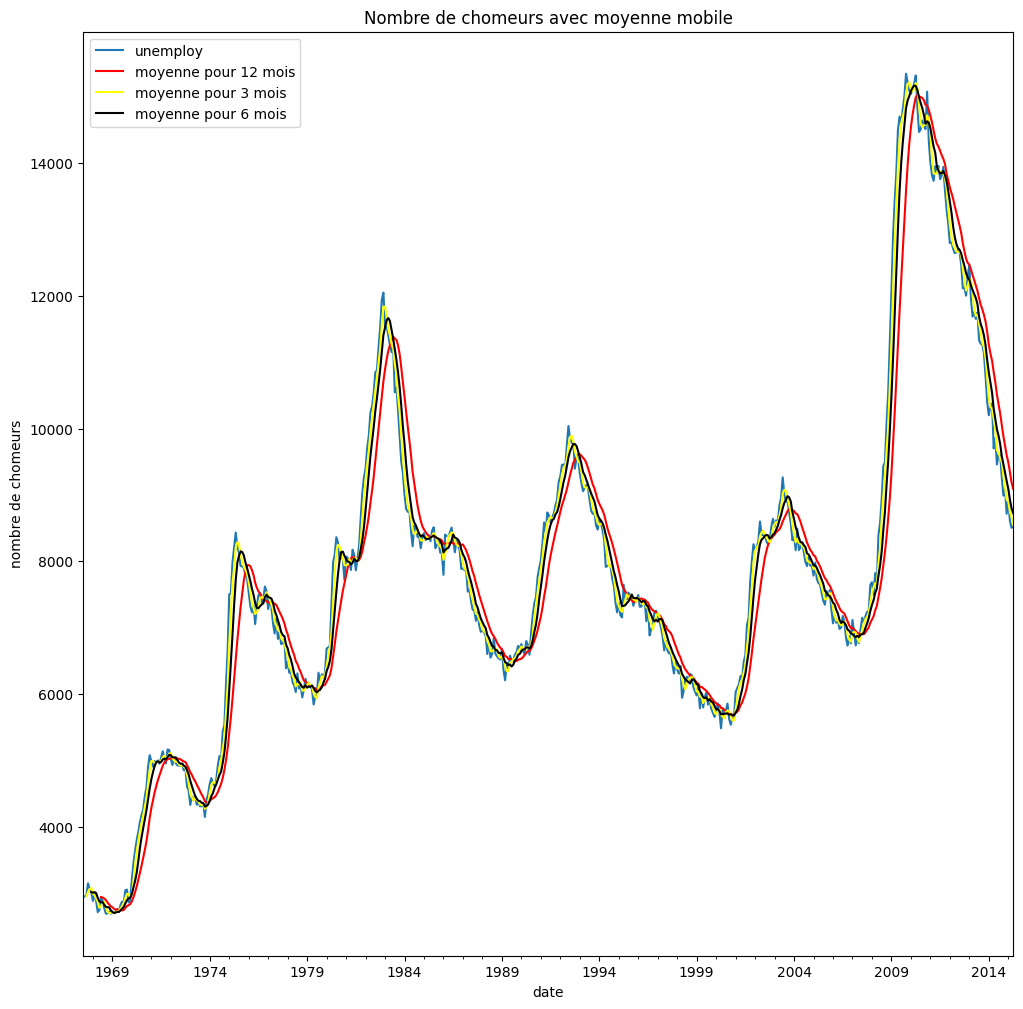

In [11]:
plt.figure(figsize=(12,12))
data["unemploy"].plot()
data["unemploy"].rolling(window=12).mean().plot(color='red',label='moyenne pour 12 mois')
data["unemploy"].rolling(window=3).mean().plot(color='yellow',label="moyenne pour 3 mois")
data["unemploy"].rolling(window=6).mean().plot(color='black',label="moyenne pour 6 mois")
plt.legend()
plt.xlabel("date")
plt.ylabel("nombre de chomeurs")
plt.title("Nombre de chomeurs avec moyenne mobile")


C:\Users\lauredie\AppData\Local\Temp\ipykernel_12488\3460879232.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data["unemploy"].resample('y').mean().plot(figsize=(10,6))


Text(0.5, 1.0, 'Moyenne annuelle du nombre de chomeurs')

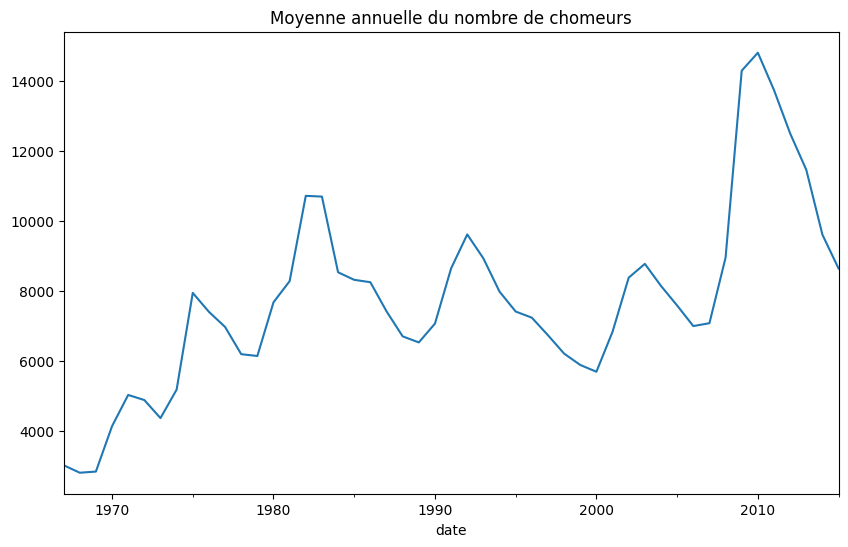

In [12]:
data["unemploy"].resample('y').mean().plot(figsize=(10,6))
plt.title("Moyenne annuelle du nombre de chomeurs")

## utilisation du model linear comme arima  et sarimax

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# pour auto ARIMA
import pmdarima as pm

In [14]:
df_arima = data["unemploy"].copy()

In [15]:
def stationarite(df) :
  result=adfuller(df)
  pv=result[1]
  stat=result[0]
  if pv > 0.05 :
    print(f"la serie n est pas stationnaire {stat}")
  else :
    print(f"laserie est stationnaire {stat}")  
   # ACF / PACF plots
  fig, axes = plt.subplots(1,2, figsize=(12,4))
  plot_acf(df, ax=axes[0], lags=48)
  plot_pacf(df, ax=axes[1], lags=48, method='ywm')
  axes[0].set_title('ACF')
  axes[1].set_title('PACF')
  plt.show() 
  # Décomposition (trend / seasonal / resid) - additive
  decomp = sm.tsa.seasonal_decompose(df, model='additive', period=12)
  fig = decomp.plot()
  fig.set_size_inches(12,8)
  plt.show()

laserie est stationnaire -3.0585256591039585


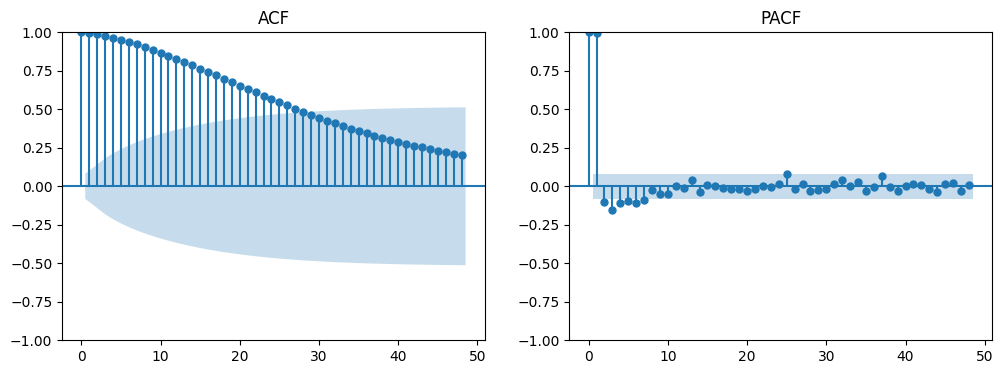

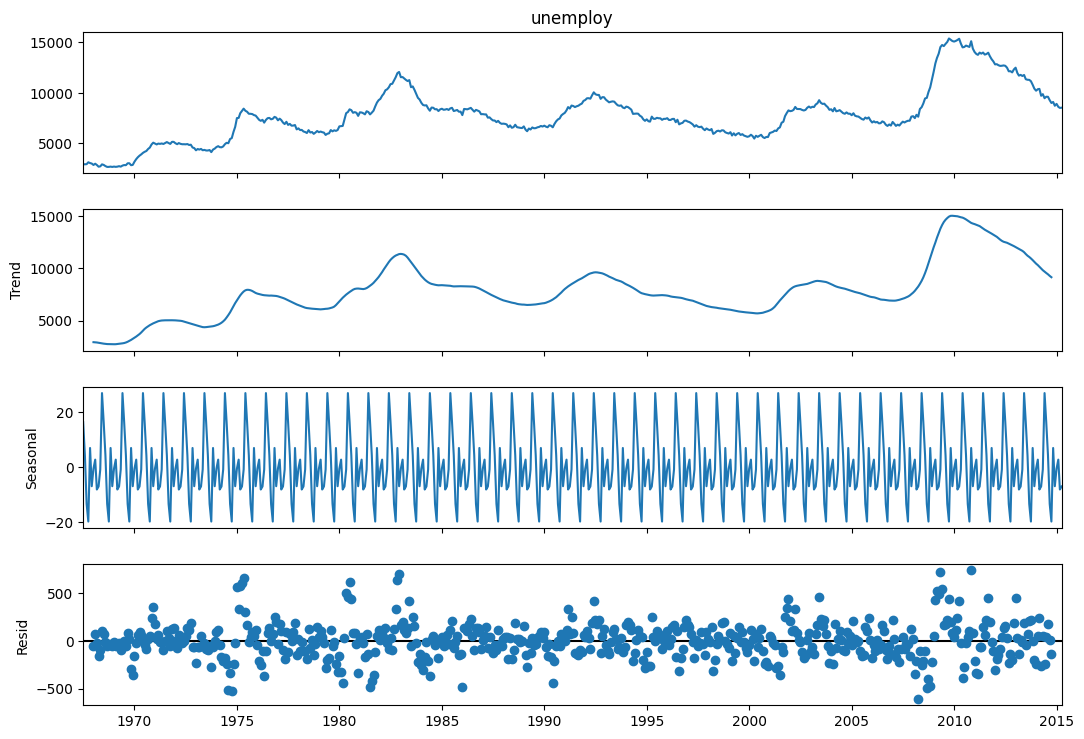

In [16]:
stationarite(df_arima)

In [17]:
dfx = np.log(df_arima.copy())

In [18]:
dfx=dfx.diff(1).dropna()

laserie est stationnaire -5.6910606766585214


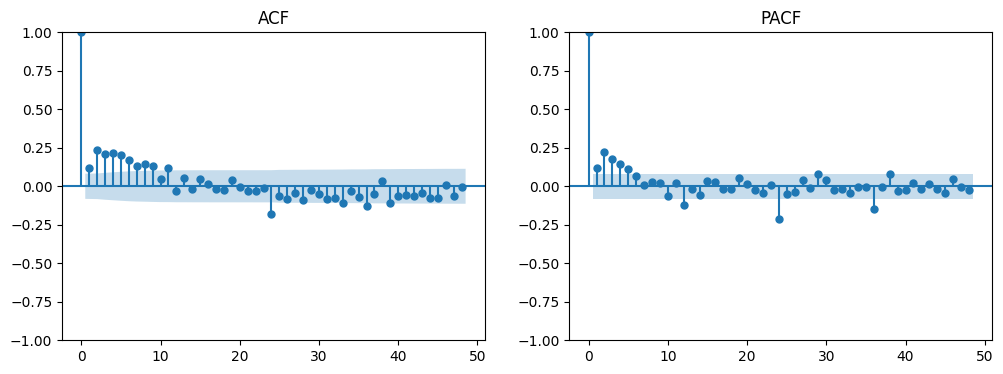

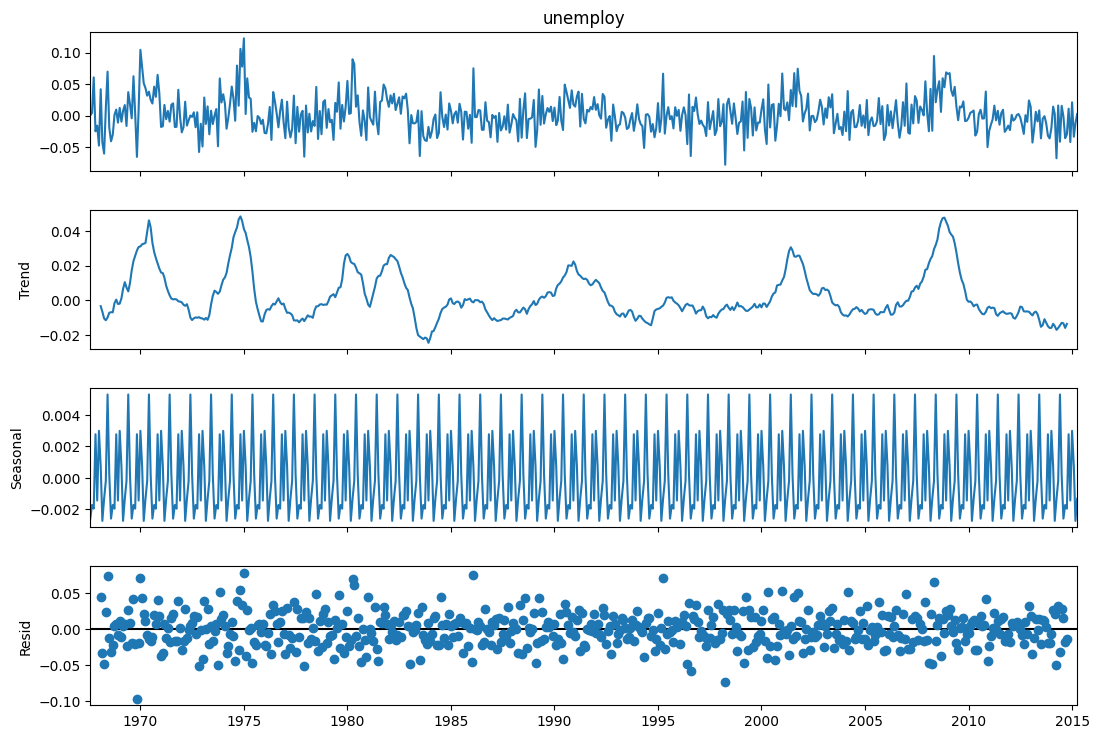

In [19]:
stationarite(dfx)

In [20]:
n_test = 24
df_arima=np.log(df_arima)
train = df_arima.iloc[:-n_test].copy()
test = df_arima.iloc[-n_test:].copy()

print("\nTrain:", train.index.min(), "->", train.index.max())
print("Test :", test.index.min(), "->", test.index.max())


Train: 1967-07-01 00:00:00 -> 2013-04-01 00:00:00
Test : 2013-05-01 00:00:00 -> 2015-04-01 00:00:00


In [21]:
# 3. ARIMA (auto arima via pmdarima) - univarié
# -------------------------
print("\n=== ARIMA (auto_arima) ===")
auto = pm.auto_arima(train, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action='ignore', max_p=2, max_q=3, d=0)
print("Choix ARIMA:", auto.summary())


=== ARIMA (auto_arima) ===
Choix ARIMA:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  550
Model:               SARIMAX(2, 0, 2)   Log Likelihood                1203.838
Date:                Sat, 22 Nov 2025   AIC                          -2395.676
Time:                        16:34:01   BIC                          -2369.817
Sample:                    07-01-1967   HQIC                         -2385.571
                         - 04-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0408      0.008      5.266      0.000       0.026       0.056
ar.L1          1.9605      0.015    126.843      0.000       1.930       1.991
ar.L2      

## avec le model arima nous constatons qu'il y a un problème car ce dernier ne respecte pas toutes les conditions pour l'utiliser pour cela nous allons utiliser d'autres models comme prophet et lstm

## le model prophet

In [22]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler

e:\analyse_financiere\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
data_prophet = data["unemploy"].reset_index()
data_prophet.columns = ['ds', 'y']

In [24]:
data_prophet['y']=np.log(data_prophet['y'])

In [25]:
data_prophet

,ds,y
0,1967-07-01,7.987524
1,1967-08-01,7.987864
2,1967-09-01,7.992269
3,1967-10-01,8.052933
4,1967-11-01,8.028129
...,...,...
569,2014-12-01,9.073030
570,2015-01-01,9.094144
571,2015-02-01,9.060680
572,2015-03-01,9.048292


In [26]:
trains =data_prophet[:-n_test].copy()
tests =data_prophet[-n_test:].copy()

In [27]:
proph =Prophet( yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.25,
    seasonality_prior_scale=0.1,)


In [28]:
proph.fit(trains)

16:34:07 - cmdstanpy - INFO - Chain [1] start processing
16:34:11 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
fututre=proph.make_future_dataframe(periods=n_test, freq='MS')

In [30]:
predi=proph.predict(fututre)

In [31]:
# --- 4. Extract train predictions aligned ---
train_pred = predi[['ds','yhat']].set_index('ds').loc[trains['ds']]
test_pred  = predi[['ds','yhat']].set_index('ds').loc[tests['ds']]

# --- 5. Metrics ---
print("MAE train :", mean_absolute_error(trains['y'], train_pred['yhat']))
print("MAE test  :", mean_absolute_error(tests['y'],  test_pred['yhat']))

print("R² train :", r2_score(trains['y'], train_pred['yhat']))
print("R² test  :", r2_score(tests['y'],  test_pred['yhat']))

MAE train : 0.06732107440303242
MAE test  : 0.48681040546056265
R² train : 0.9237648313584643
R² test  : -23.463358009236373


### meme prophet n'est pas adapté pour predire le nombre de chomeurs en usa pour chaque mois

## LSTM ET GRU

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator


In [33]:
data_lsm= data['unemploy']

In [34]:
percent=int(len(data_lsm)*0.8)

In [35]:
train =data_lsm[:percent]
test= data_lsm[percent:]

In [36]:
"""preparation du model"""
st=StandardScaler()
train_sc=st.fit_transform(train.values.reshape(-1,1))
test_sc=st.transform(test.values.reshape(-1,1))

## PREPARATION DE DONNEES POUR LE MODEL LSTM

In [37]:
batch=2
stride=1
lenght=10

In [38]:
"""on peut egalement utiliser le timeseriesgenerators pour  preparer nos données """
train_generator=TimeseriesGenerator(train_sc,train_sc,length=lenght,stride=stride,batch_size=batch)

In [39]:
def create_sequences(dataset, look_back=30):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        # On prend les 'look_back' valeurs précédentes
        X.append(dataset[i-look_back:i, 0])
        # On prend la valeur actuelle comme cible à prédire
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Hyperparamètre : Combien de pas en arrière le modèle doit regarder ?
LOOK_BACK =30  
X, y = create_sequences(train_sc, LOOK_BACK)

# Redimensionnement pour LSTM [échantillons, pas de temps, fonctionnalités]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(f"Forme de X: {X.shape} (Échantillons, Fenêtre, Features)")

Forme de X: (429, 30, 1) (Échantillons, Fenêtre, Features)


In [40]:
x_train,y_train=create_sequences(train_sc,30)
x_test,y_test=create_sequences(test_sc,30)

## CONSTRUCTION DU MODEL

In [41]:
model = Sequential()

# Couche LSTM 1
# return_sequences=True est nécessaire si on empile une autre couche LSTM après
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # Pour éviter le surapprentissage
# Couche LSTM 2
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Couche de sortie (Dense)
# Une seule neurone car on prédit une seule valeur (y)
model.add(Dense(units=1))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Résumé
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
y_train.shape

(429,)

Epoch 1/20

14/14 [==============================] - 14s 183ms/step - loss: 0.3601 - val_loss: 1.5927
Epoch 2/20
14/14 [==============================] - 1s 43ms/step - loss: 0.1675 - val_loss: 1.7995
Epoch 3/20
14/14 [==============================] - 1s 43ms/step - loss: 0.0962 - val_loss: 0.7890
Epoch 4/20
14/14 [==============================] - 1s 42ms/step - loss: 0.0724 - val_loss: 0.5758
Epoch 5/20
14/14 [==============================] - 1s 41ms/step - loss: 0.0720 - val_loss: 0.6539
Epoch 6/20
14/14 [==============================] - 1s 41ms/step - loss: 0.0639 - val_loss: 0.4126
Epoch 7/20
14/14 [==============================] - 1s 41ms/step - loss: 0.0579 - val_loss: 0.4472
Epoch 8/20
14/14 [==============================] - 1s 40ms/step - loss: 0.0519 - val_loss: 0.3461
Epoch 9/20
14/14 [==============================] - 1s 40ms/step - loss: 0.0529 - val_loss: 0.3861
Epoch 10/20
14/14 [==============================] - 1s 42ms/step - loss: 0.0472 - val_loss: 0.7069
Epoch 

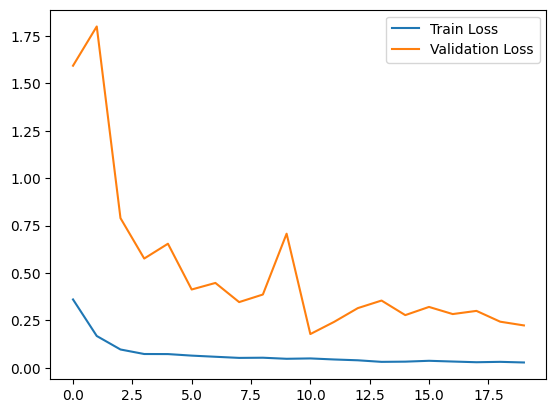

In [43]:
history = model.fit(
    x_train, y_train,
    epochs=20,           # Nombre de passages sur les données
    batch_size=32,       # Nombre d'échantillons par mise à jour du gradient
    validation_data=(x_test, y_test),
    verbose=1
)

# Visualiser la perte (Loss) pour voir si l'apprentissage se passe bien
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

3/3 [==============================] - 1s 8ms/step


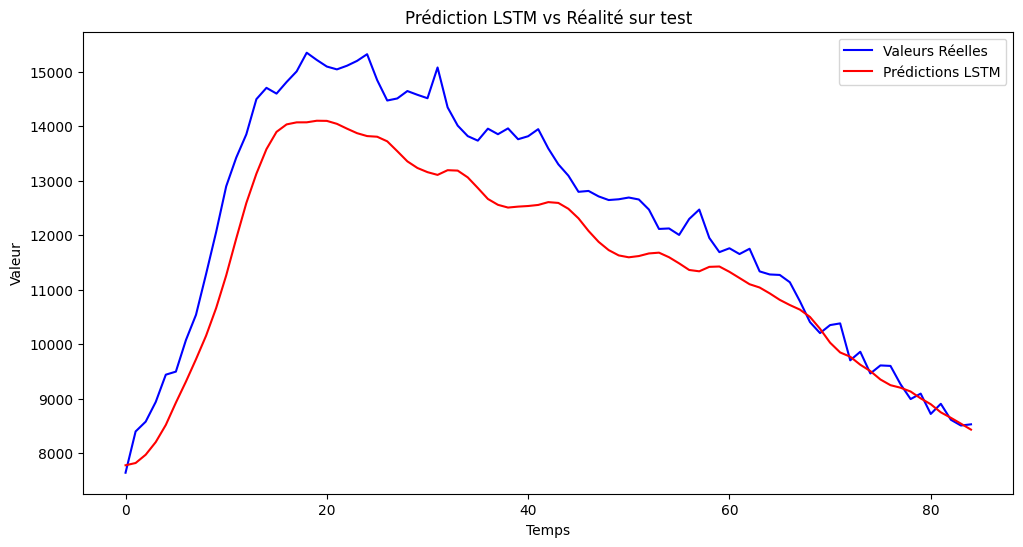

In [44]:
# Faire les prédictions
predictions = model.predict(x_test)

# Inverser la normalisation (revenir à l'échelle originale)
predictions_reelles = st.inverse_transform(predictions)
y_test_reels = st.inverse_transform(y_test.reshape(-1, 1))

# Visualisation finale
plt.figure(figsize=(12,6))
plt.plot(y_test_reels, color='blue', label='Valeurs Réelles')
plt.plot(predictions_reelles, color='red', label='Prédictions LSTM')
plt.title('Prédiction LSTM vs Réalité sur test')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.show()

14/14 [==============================] - 0s 11ms/step


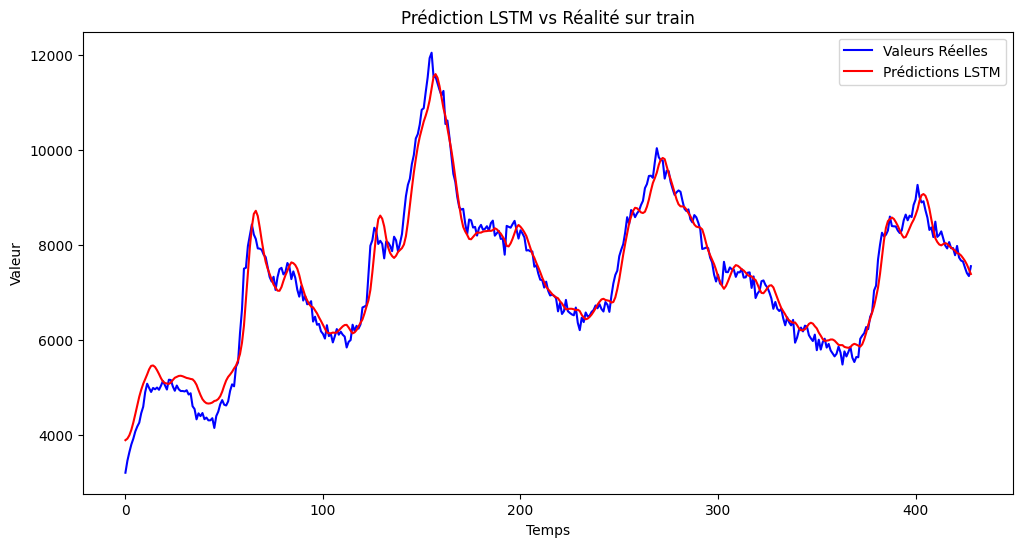

In [45]:
"""prediction sur train"""
# Faire les prédictions
predictions = model.predict(x_train)

# Inverser la normalisation (revenir à l'échelle originale)
predictions_reelles = st.inverse_transform(predictions)
y_train_reels = st.inverse_transform(y_train.reshape(-1, 1))

# Visualisation finale
plt.figure(figsize=(12,6))
plt.plot(y_train_reels, color='blue', label='Valeurs Réelles')
plt.plot(predictions_reelles, color='red', label='Prédictions LSTM')
plt.title('Prédiction LSTM vs Réalité sur train')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.show()

In [50]:
import numpy as np

# --- CONFIGURATION ---
FUTURE_STEPS = 24
LOOK_BACK = 30 

# 1. INITIALISATION
# On part de la fin du test scalé
last_sequence = test_sc[-LOOK_BACK:]
# On s'assure du format float32 pour éviter tout conflit de type
current_batch = last_sequence.astype(np.float32).reshape(1, LOOK_BACK, 1)

future_predictions = []

print(f"⏳ Démarrage de la prédiction directe pour {FUTURE_STEPS} pas...")

# 2. BOUCLE RÉCURSIVE (Mode Appel Direct)
for i in range(FUTURE_STEPS):
    
    # A. PRÉDICTION DIRECTE (La Correction Clé)
    # On appelle model() au lieu de model.predict().
    # training=False dit au modèle qu'on n'est pas en train d'apprendre (désactive le Dropout)
    pred_tensor = model(current_batch, training=False)
    
    # Le résultat est un Tenseur, on le convertit en valeur Python simple
    valeur_predite = pred_tensor.numpy()[0, 0]
    
    # B. Stockage
    future_predictions.append(valeur_predite)
    
    # C. Mise à jour (Sliding Window)
    # On prépare la nouvelle valeur (format 3D : 1 échantillon, 1 pas, 1 feature)
    new_pred_reshaped = np.array([[[valeur_predite]]], dtype=np.float32)
    
    # On coupe l'ancien (tout sauf le premier élément)
    batch_sliced = current_batch[:, 1:, :]
    
    # On colle (Concaténation NumPy stable)
    current_batch = np.concatenate([batch_sliced, new_pred_reshaped], axis=1)

print("✅ Prédictions terminées sans erreur !")

# --- RESTE DU CODE (Affichage) ---
# Inverse transform...



⏳ Démarrage de la prédiction directe pour 24 pas...
✅ Prédictions terminées sans erreur !


In [ ]:
def lstm_predict_future_monthly(model, data_scaled, seq_length, n_months, last_date, scaler=None):
    # Assurer une forme correcte (n_samples, 1)
    data_scaled = np.array(data_scaled).reshape(-1, 1)

    # On aplatit proprement mais en float64
    flat = data_scaled.astype(float).flatten()

    # Séquence initiale
    seq = list(flat[-seq_length:])

    predictions_scaled = []

    for _ in range(n_months):
        # Toujours reshape vers (1, seq_length, 1)
        X = np.array(seq[-seq_length:], dtype=float).reshape(1, seq_length, 1)

        pred = model.predict(X, verbose=0)[0][0]

        predictions_scaled.append(pred)
        seq.append(pred)

    # Inverse scaling
    if scaler is not None:
        predictions = scaler.inverse_transform(
            np.array(predictions_scaled).reshape(-1, 1)
        ).flatten()
    else:
        predictions = np.array(predictions_scaled)

    # Génération des dates mensuelles
    future_dates = pd.date_range(start=last_date, periods=n_months + 1, freq='MS')[1:]

    return pd.DataFrame({"ds": future_dates, "yhat": predictions})



Timestamp('2015-04-01 00:00:00')

In [52]:
seq_length = 30
n_months = 12   # 24 mois de forecast
last_date = data_lsm.index[-1] 
lstm_predict_future_monthly(model,train_sc,seq_length,n_months,last_date,scaler=st)

TypeError: in user code:

    File "e:\analyse_financiere\venv\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "e:\analyse_financiere\venv\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\analyse_financiere\venv\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "e:\analyse_financiere\venv\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "e:\analyse_financiere\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\analyse_financiere\venv\Lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
def lstm_predict_future_monthly(model, train_sc, seq_length, future_steps, last_date, scaler):
    """
    Prédiction multi-steps mensuelle avec un LSTM entraîné sur seq_length = 30.
    train_sc doit être de la forme (n,1).
    """

    # Vérification harde : train_sc doit contenir au moins seq_length valeurs
    if train_sc.shape[0] < seq_length:
        raise ValueError(f"train_sc trop court : {train_sc.shape[0]} valeurs, il en faut {seq_length}")

    # On récupère exactement les seq_length derniers points
    last_seq = train_sc[-seq_length:].reshape(1, seq_length, 1)

    predictions_scaled = []

    current_seq = last_seq.copy()

    for _ in range(future_steps):

        # 1) prédire 1 pas
        pred_scaled = model.predict(current_seq, verbose=0)

        # 2) stocker cette prédiction
        predictions_scaled.append(pred_scaled[0, 0])

        # 3) mettre à jour la séquence :
        #    on enlève l'ancienne première valeur et on ajoute la nouvelle
        current_seq = np.append(current_seq[:, 1:, :], [[pred_scaled]], axis=1)

    # Conversion en array
    predictions_scaled = np.array(predictions_scaled).reshape(-1, 1)

    # Inversion du scaling
    predictions = scaler.inverse_transform(predictions_scaled)

    # Création des dates futures mensuelles
    future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq="MS")[1:]

    df_pred = pd.DataFrame({
        "date": future_dates,
        "prediction": predictions.flatten()
    })

    return df_pred


In [ ]:
df_pred = lstm_predict_future_monthly(
    model=model,
    train_sc=train_sc,
    seq_length=30,
    future_steps=24,
    last_date=data_lsm.index[-1],
    scaler=st
)

print(df_pred.head())

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:

# --- 🎯 CONFIGURATION CORRIGÉE 🎯 ---
FUTURE_STEPS = 30 
LOOK_BACK = 30  # <-- DOIT ABSOLUMENT CORRESPONDRE À (None, 30, 1)

# Variables à définir selon votre contexte :
# TEST_SCALED_DATA (votre jeu de test normalisé)
# scaler (votre objet MinMaxScaler)
# model (votre modèle Sequential)
# df (votre DataFrame original)
# ------------------------------------

# Jours fériés (à adapter)
jours_feries = ['2024-12-25', '2025-01-01', '2025-05-01'] 
jours_feries_dt = pd.to_datetime(jours_feries)

# --- I. GESTION DES DATES FUTURES (Jours Valides) ---

last_date = pd.to_datetime(data_lsm.index[-1]) 
dates_pool = pd.date_range(start=last_date, periods=FUTURE_STEPS + 50, freq='MS')[1:]

final_dates = []
for date in dates_pool:
    is_holiday = date in jours_feries_dt
    is_weekend = date.dayofweek >= 5 
    if not is_holiday and not is_weekend: 
        final_dates.append(date)

final_dates = final_dates[:FUTURE_STEPS]

# --- II. INITIALISATION LSTM (LOOK_BACK = 30) ---

# 1. Récupérer la graine (seed) à la fin du jeu de test normalisé
last_sequence = test_sc[-LOOK_BACK:] 

# 2. Conversion sécurisée en float32 et reshape 3D : (1, 30, 1)
current_batch_numpy = last_sequence.astype(np.float32).reshape(1, LOOK_BACK, 1) 

predictions_scaled = []

print(f"⏳ Démarrage de la prédiction pour les {len(final_dates)} jours valides...")

# --- III. BOUCLE DE PRÉDICTION RÉCURSIVE (Corrigée avec CONCATENATE) ---
for i in range(len(final_dates)):
    
    # A. Conversion en Tenseur TF et Prédiction
    current_batch_tensor = tf.convert_to_tensor(current_batch_numpy)
    pred_one_step = model.predict(current_batch_tensor, verbose=0)
    
    # Stockage de la prédiction
    predictions_scaled.append(pred_one_step.numpy()[0, 0]) 
    
    # B. MISE À JOUR SÉCURISÉE AVEC np.concatenate
    new_prediction_reshaped = pred_one_step.astype(np.float32).reshape(1, 1, 1)
    
    # Slice (enlever le plus ancien : le premier élément)
    batch_sliced = current_batch_numpy[:, 1:, :] 
    
    # Concatenation : Joindre le lot coupé (maintenant de taille 29) et la nouvelle prédiction (taille 1)
    # Le résultat est à nouveau de taille 30
    current_batch_numpy = np.concatenate([batch_sliced, new_prediction_reshaped], axis=1)

print("✅ Prédictions terminées avec succès.")

# --- IV. FIN DE TRAITEMENT ET AFFICHAGE ---

# 1. Retour aux valeurs réelles
predictions_reelles = st.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))

# 2. Création du DataFrame final
df_future = pd.DataFrame({
    'Date': final_dates,  
    'Prediction_Reelle': predictions_reelles.flatten()
})

print("\n📈 Prévisions dans le Futur (Premières Lignes) :")
print(df_future.head())
# ... (le code de plotting suit)

⏳ Démarrage de la prédiction pour les 30 jours valides...


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>